In [220]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.io import arff
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch, Circle
import matplotlib.colors as mcolors
from matplotlib import colormaps
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import to_hex, to_rgba, Normalize, LogNorm, TwoSlopeNorm, BoundaryNorm
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import randn
from numpy.random import seed
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from bokeh.plotting import figure, output_file, show
from bokeh.models import GeoJSONDataSource
import geopandas as gpd
import folium
from PIL import Image
import plotly.graph_objects as go
import plotly.graph_objs as go
import plotly.offline as py
import os
import glob
from geopandas import clip
from shapely.geometry import MultiPolygon, Polygon
import networkx as nx
import squarify

In [221]:
file_path = '/Users/keriwilkins/Documents/Provisional Natality - 2023 through 02-29-24-V2.xlsx'

In [222]:
raw_data = pd.read_excel(file_path)

In [223]:
print(raw_data)

      State of Residence  State of Residence Code Mother's Single Race 15  \
0                Alabama                      1.0                   White   
1                Alabama                      1.0                   White   
2                Alabama                      1.0                   White   
3                Alabama                      1.0                   White   
4                Alabama                      1.0                   White   
...                  ...                      ...                     ...   
34589          Wisconsin                     55.0      More than one race   
34590          Wisconsin                     55.0      More than one race   
34591          Wisconsin                     55.0      More than one race   
34592          Wisconsin                     55.0      More than one race   
34593            Wyoming                     56.0      More than one race   

       Mother's Single Race 15 Code Number of Prenatal Visits Recode  \
0  

In [224]:
print(len(raw_data))

34594


In [225]:
print((raw_data).dtypes)

State of Residence                        object
State of Residence Code                  float64
Mother's Single Race 15                   object
Mother's Single Race 15 Code             float64
Number of Prenatal Visits Recode          object
Number of Prenatal Visits Recode Code    float64
Month Prenatal Care Began                 object
Month Prenatal Care Began Code           float64
OE Gestational Age Weekly                 object
OE Gestational Age Weekly Code           float64
Births                                   float64
dtype: object


In [226]:
print((raw_data).columns)

Index(['State of Residence', 'State of Residence Code',
       'Mother's Single Race 15', 'Mother's Single Race 15 Code',
       'Number of Prenatal Visits Recode',
       'Number of Prenatal Visits Recode Code', 'Month Prenatal Care Began',
       'Month Prenatal Care Began Code', 'OE Gestational Age Weekly',
       'OE Gestational Age Weekly Code', 'Births'],
      dtype='object')


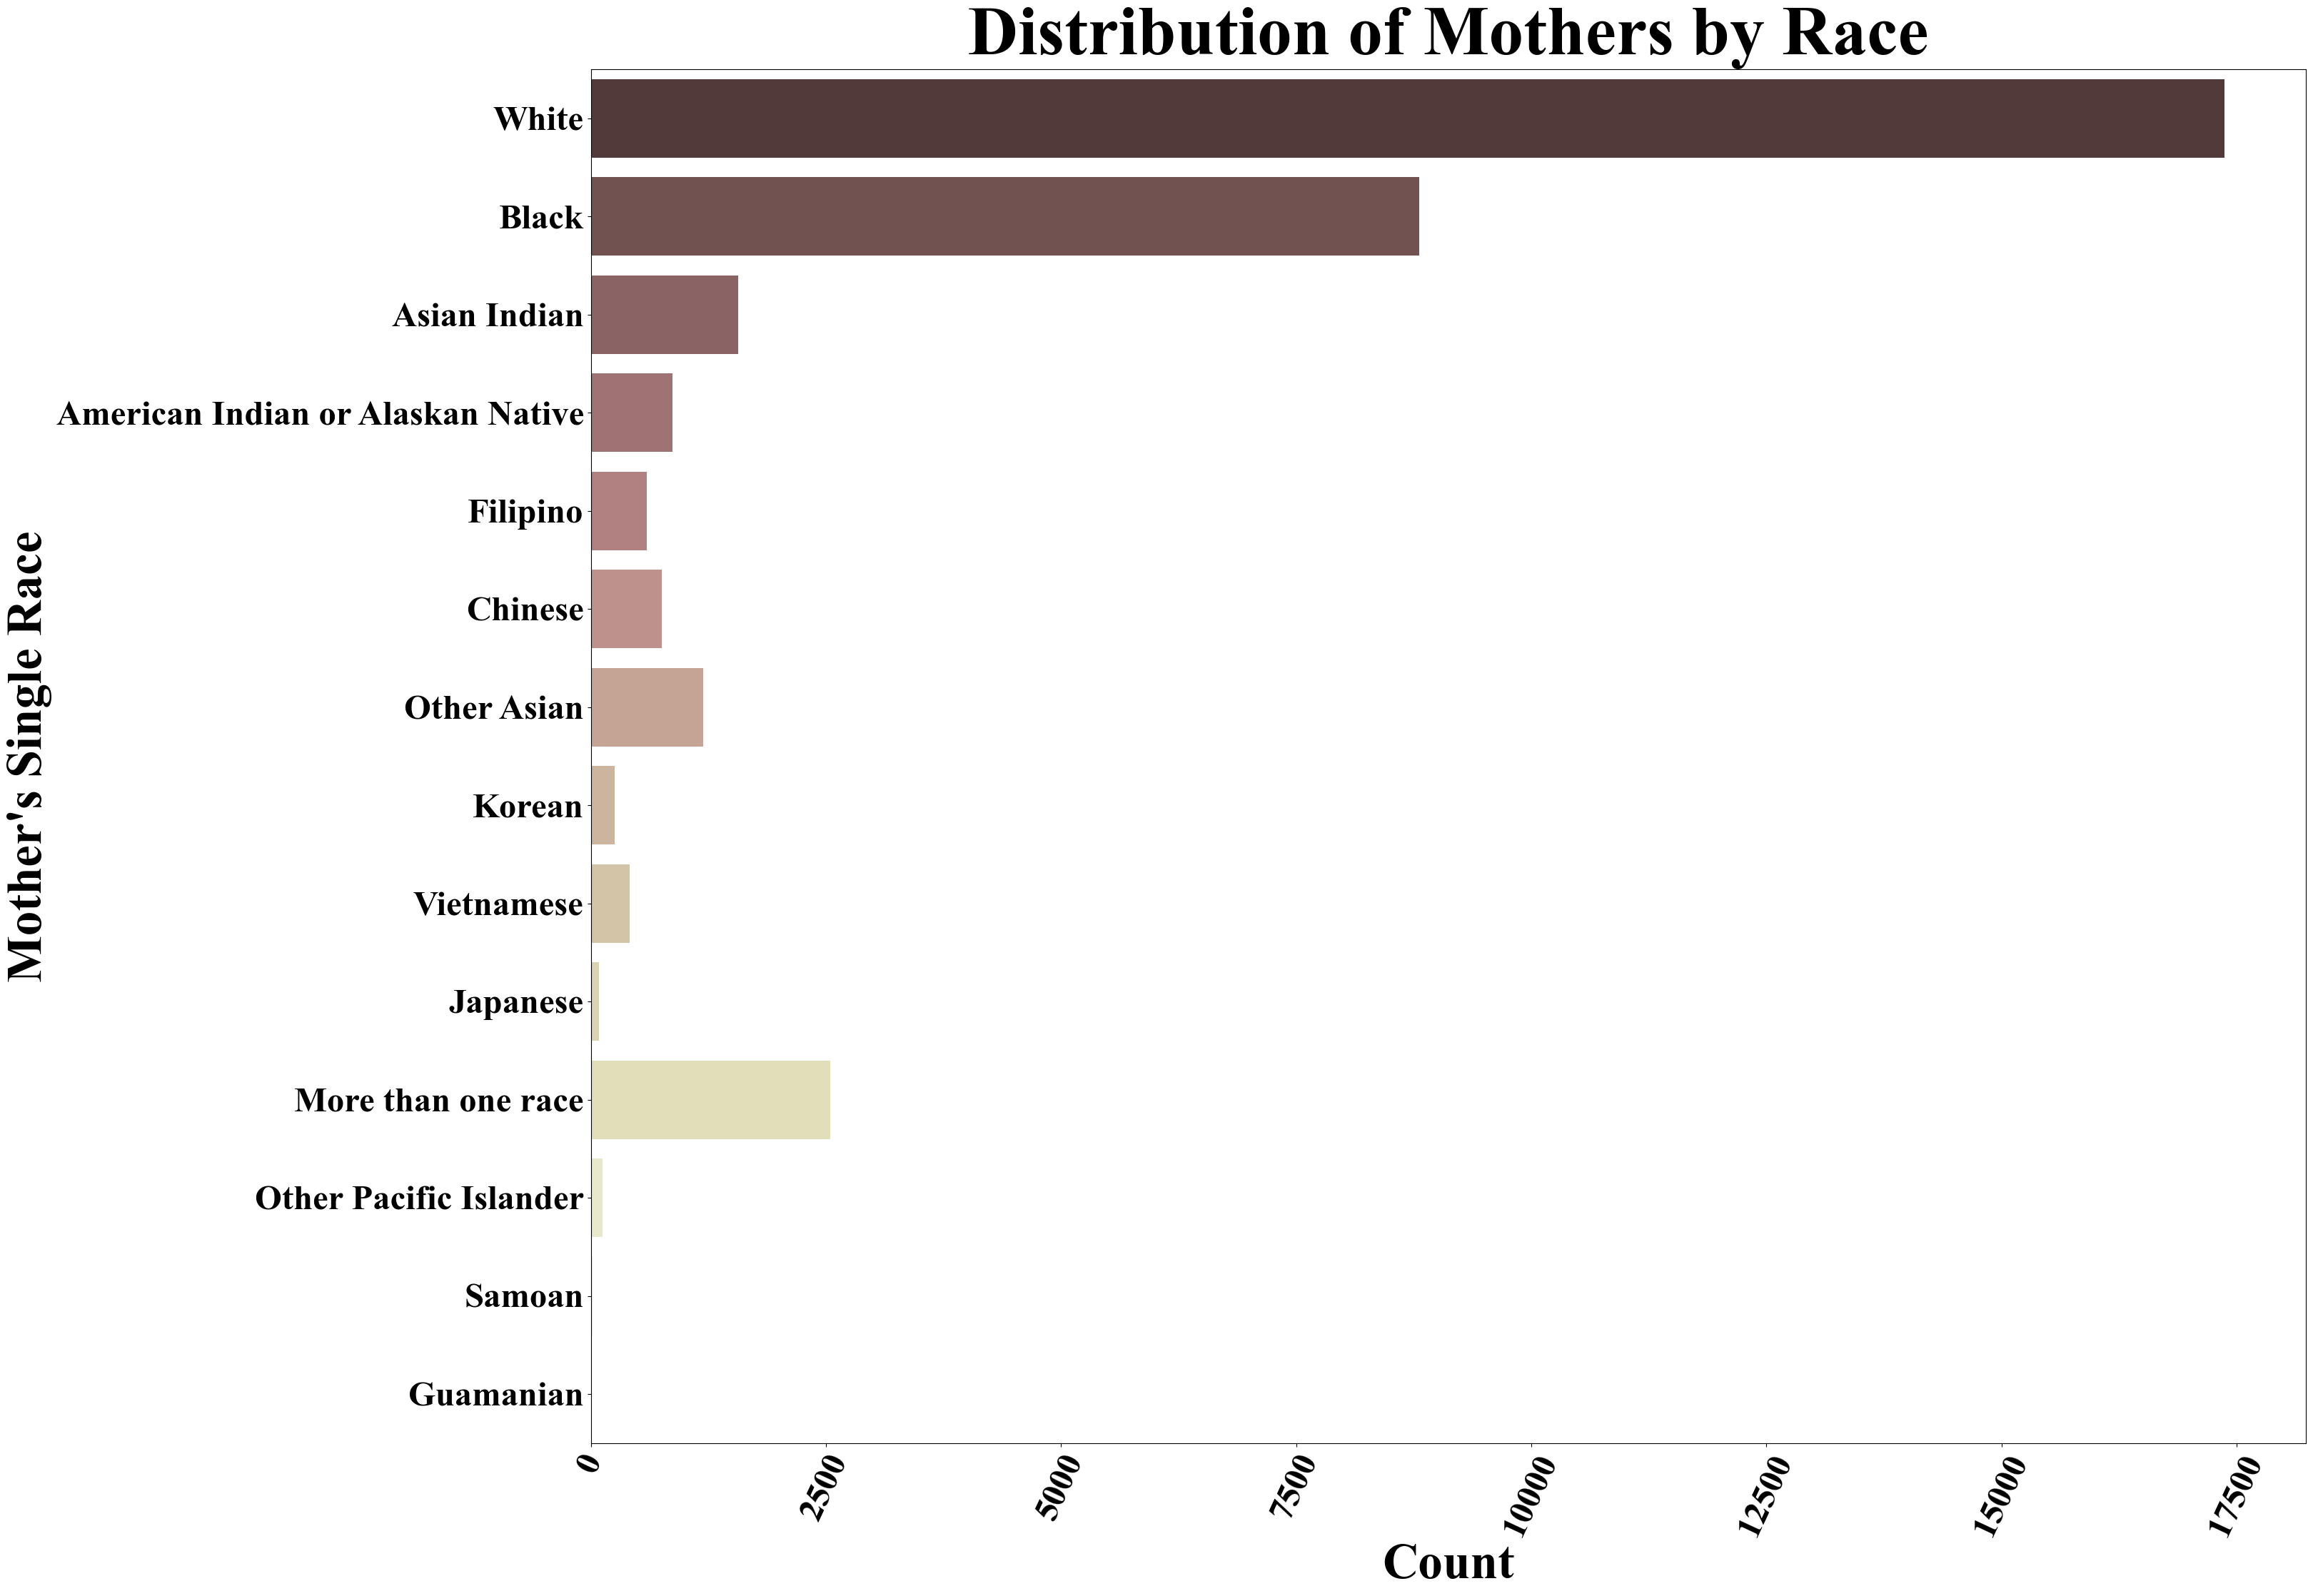

In [283]:
plt.figure(figsize=(31, 25), facecolor='none')
sns.countplot(y="Mother's Single Race 15", data=raw_data, hue="Mother's Single Race 15", legend=False, palette='pink')
plt.title('Distribution of Mothers by Race', fontsize=70, fontweight='bold', fontname='Times New Roman')
plt.xlabel('Count', fontsize=50, fontweight='bold', fontname='Times New Roman')
plt.ylabel("Mother's Single Race", fontsize=50, fontweight='bold', fontname='Times New Roman')
plt.xticks(rotation=65, fontsize=35, fontweight='bold', fontname='Times New Roman')
plt.yticks(fontsize=35,fontweight='bold', fontname='Times New Roman')
plt.savefig('distribution_of_mothers_by_race.png', transparent=True)
plt.show()

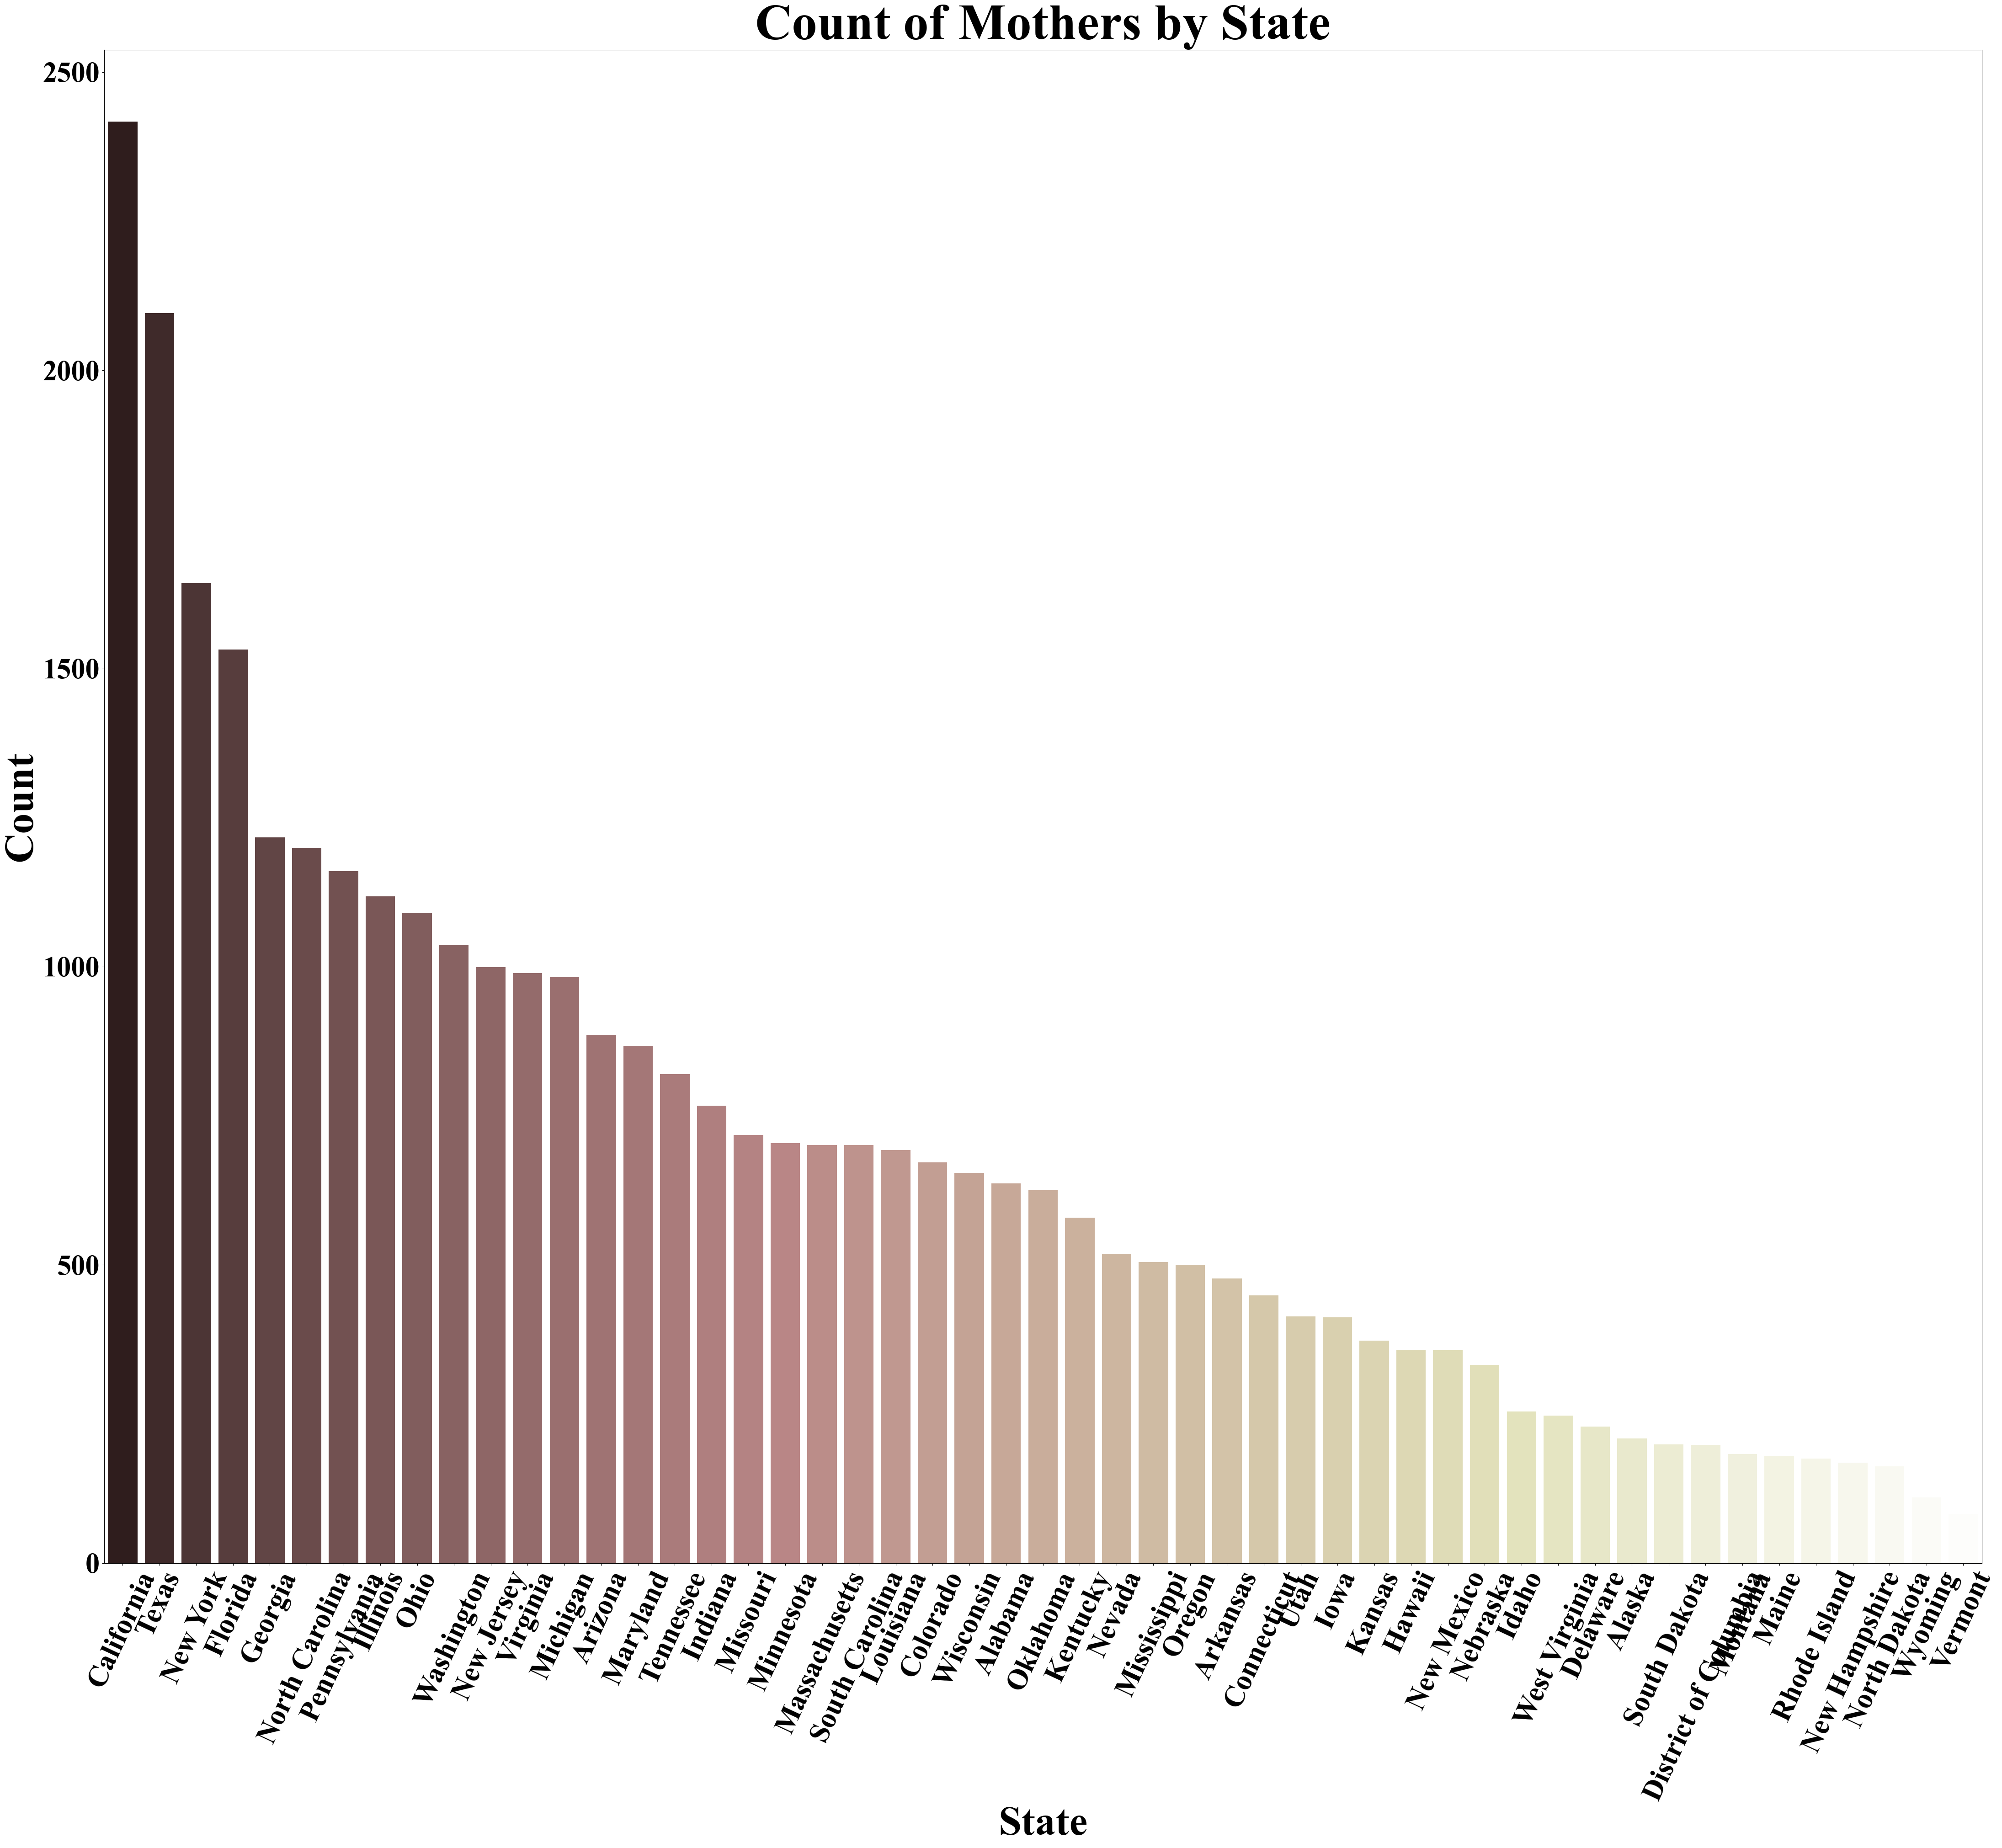

In [286]:
plt.figure(figsize=(53, 43))
sns.barplot(x=raw_data['State of Residence'].value_counts().index, 
            y=raw_data['State of Residence'].value_counts(),
            hue=raw_data['State of Residence'].value_counts().index,
            legend=False, palette='pink')
plt.title('Count of Mothers by State', fontsize=80, fontweight='bold', fontname='Times New Roman')
plt.xlabel('State', fontsize=65, fontweight='bold', fontname='Times New Roman')
plt.ylabel('Count', fontsize=65, fontweight='bold', fontname='Times New Roman')
plt.xticks(rotation=65, fontsize=45,fontweight='bold', fontname='Times New Roman')
plt.yticks(fontsize=45,fontweight='bold', fontname='Times New Roman')
plt.savefig('distribution_of_mothers_by_state.png', transparent=True)

plt.show()

In [229]:
population_data = pd.read_excel('/Users/keriwilkins/Library/CloudStorage/OneDrive-Personal/Documents/Population Data By State 2023.xlsx')

In [230]:
population_data['State of Residence'] = population_data['State of Residence'].str.slice(start=1)

In [231]:
print(population_data )

      State of Residence      2023
0                Alabama   5108468
1                 Alaska    733406
2                Arizona   7431344
3               Arkansas   3067732
4             California  38965193
5               Colorado   5877610
6            Connecticut   3617176
7               Delaware   1031890
8   District of Columbia    678972
9                Florida  22610726
10               Georgia  11029227
11                Hawaii   1435138
12                 Idaho   1964726
13              Illinois  12549689
14               Indiana   6862199
15                  Iowa   3207004
16                Kansas   2940546
17              Kentucky   4526154
18             Louisiana   4573749
19                 Maine   1395722
20              Maryland   6180253
21         Massachusetts   7001399
22              Michigan  10037261
23             Minnesota   5737915
24           Mississippi   2939690
25              Missouri   6196156
26               Montana   1132812
27              Nebr

In [232]:
birth_counts_by_state = raw_data['State of Residence'].value_counts().reset_index()
birth_counts_by_state.columns = ['State of Residence', 'Birth Count']

In [233]:
print(birth_counts_by_state)

      State of Residence  Birth Count
0             California         2417
1                  Texas         2096
2               New York         1643
3                Florida         1532
4                Georgia         1217
5         North Carolina         1199
6           Pennsylvania         1160
7               Illinois         1118
8                   Ohio         1090
9             Washington         1036
10            New Jersey          999
11              Virginia          989
12              Michigan          982
13               Arizona          886
14              Maryland          867
15             Tennessee          820
16               Indiana          767
17              Missouri          718
18             Minnesota          704
19         Massachusetts          701
20        South Carolina          701
21             Louisiana          693
22              Colorado          672
23             Wisconsin          654
24               Alabama          637
25          

In [234]:
normalized_raw_data = pd.merge(population_data, birth_counts_by_state, how='left', on='State of Residence')

In [235]:
# Print the merged DataFrame
print(normalized_raw_data)

      State of Residence      2023  Birth Count
0                Alabama   5108468          637
1                 Alaska    733406          209
2                Arizona   7431344          886
3               Arkansas   3067732          477
4             California  38965193         2417
5               Colorado   5877610          672
6            Connecticut   3617176          449
7               Delaware   1031890          229
8   District of Columbia    678972          198
9                Florida  22610726         1532
10               Georgia  11029227         1217
11                Hawaii   1435138          358
12                 Idaho   1964726          254
13              Illinois  12549689         1118
14               Indiana   6862199          767
15                  Iowa   3207004          412
16                Kansas   2940546          373
17              Kentucky   4526154          579
18             Louisiana   4573749          693
19                 Maine   1395722      

In [236]:
normalized_raw_data['Births per 1000 People'] = (normalized_raw_data['Birth Count'] / normalized_raw_data[2023]) * 1000


In [237]:
print(normalized_raw_data)


      State of Residence      2023  Birth Count  Births per 1000 People
0                Alabama   5108468          637                0.124695
1                 Alaska    733406          209                0.284972
2                Arizona   7431344          886                0.119225
3               Arkansas   3067732          477                0.155489
4             California  38965193         2417                0.062030
5               Colorado   5877610          672                0.114332
6            Connecticut   3617176          449                0.124130
7               Delaware   1031890          229                0.221923
8   District of Columbia    678972          198                0.291617
9                Florida  22610726         1532                0.067755
10               Georgia  11029227         1217                0.110343
11                Hawaii   1435138          358                0.249453
12                 Idaho   1964726          254                0

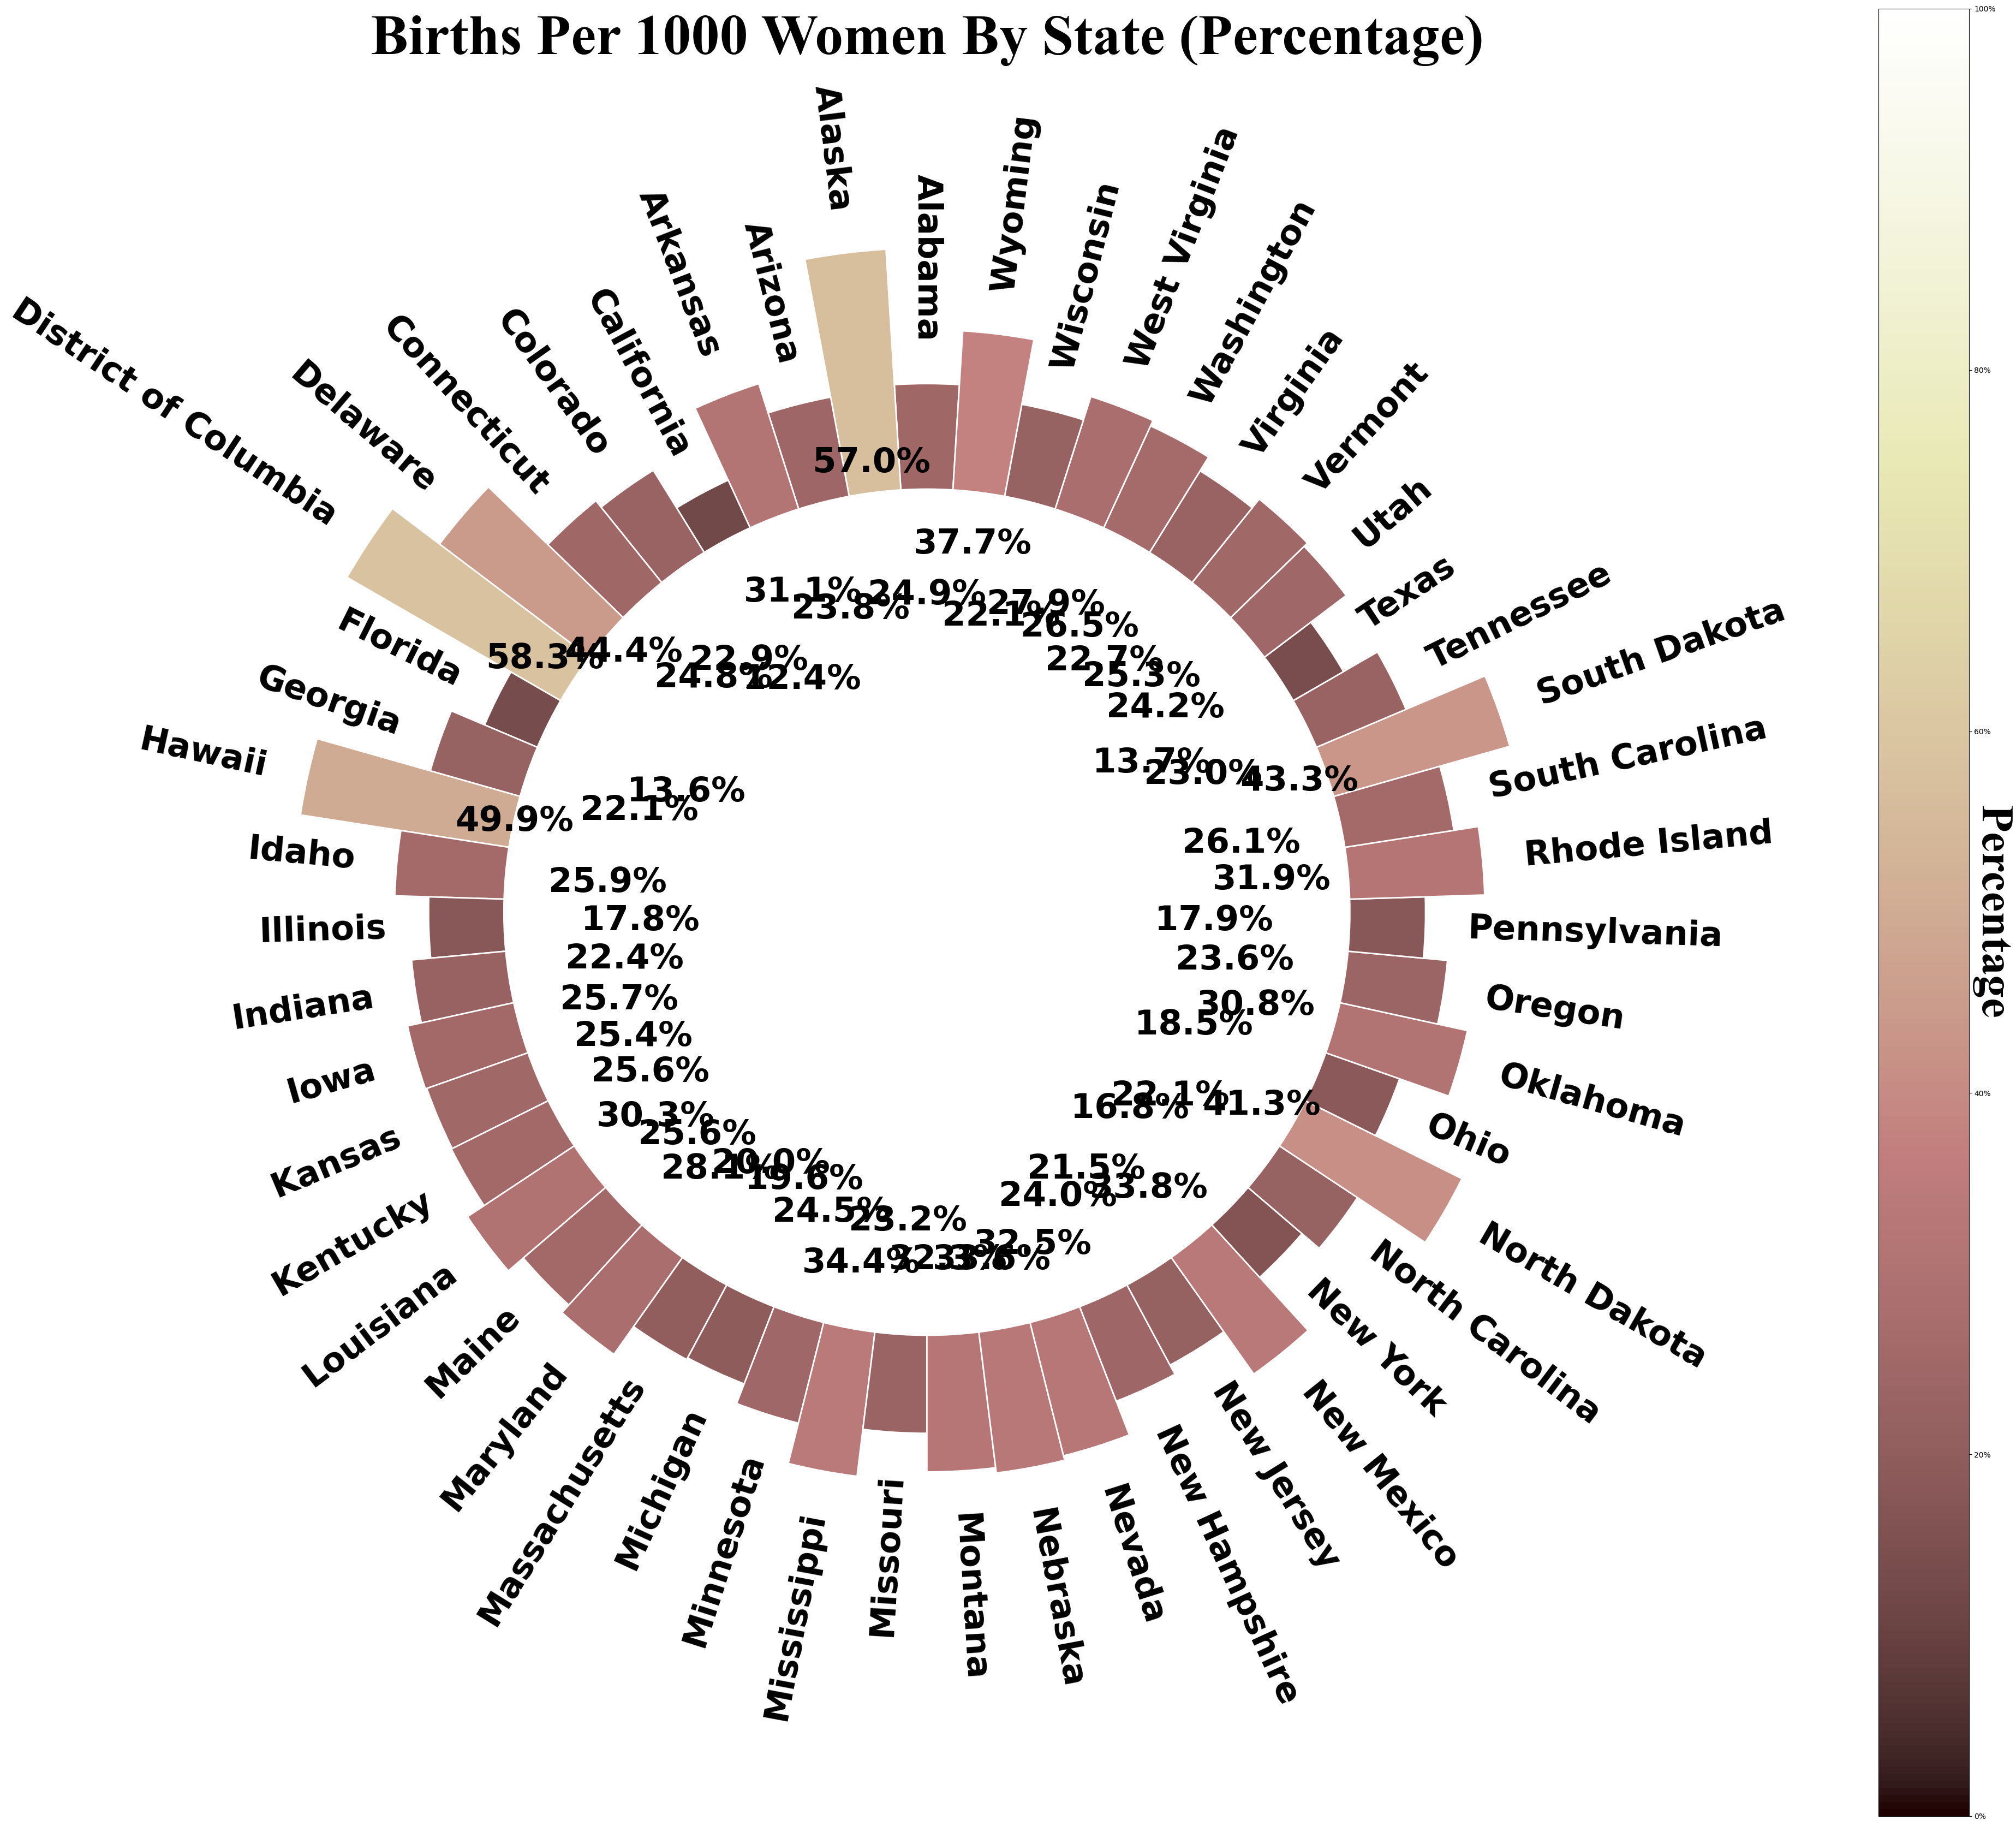

In [321]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

ANGLES = np.linspace(0, 2 * np.pi, len(normalized_raw_data), endpoint=False)
VALUES = normalized_raw_data['Births per 1000 People'].values * 2
LABELS = normalized_raw_data['State of Residence'].values
# Convert Births Per 1000 Women to percentages
percentages = VALUES * 100

# Determine the width of each bar. 
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2 * np.pi / len(VALUES)

# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

# Initialize Figure and Axis
fig, ax = plt.subplots(figsize=(50, 43), subplot_kw={"projection": "polar"})

# Specify offset
ax.set_theta_offset(OFFSET)

# Set limits for radial (y) axis. The negative lower bound creates the whole in the middle.
ax.set_ylim(-100, 100)

# Remove all spines
ax.set_frame_on(False)

# Remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add labels
def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 10  # Change this value for different padding
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor",
            fontweight='bold',
            fontsize=45
        )

# Add labels
add_labels(ANGLES, percentages, LABELS, OFFSET, ax)

# Add bars with colormap
bars = ax.bar(
    ANGLES, percentages, width=WIDTH, linewidth=2,
    color=plt.cm.pink(percentages / 100), edgecolor="white"
)

# Add percentages as text inside the circle
percentage_padding = -50  # Adjust this value for the desired padding
for angle, percentage in zip(ANGLES, percentages):
    ax.text(
        x=angle, 
        y=percentage + percentage_padding, 
        s=f'{percentage:.1f}%', 
        ha='center', 
        va='center', 
        fontsize=45,
        fontweight='bold',
        color='black'
    )

# Add colorbar legend
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='pink', norm=plt.Normalize(vmin=0, vmax=100)), ax=ax, format=ticker.PercentFormatter())
cbar.set_label('Percentage', rotation=270, labelpad=20, fontsize= 60, fontweight='bold', fontname='Times New Roman')

plt.title('Births Per 1000 Women By State (Percentage)', fontsize=75, fontweight='bold', fontname='Times New Roman')
plt.savefig('births_of_mothers_by_state.png', transparent=True)
plt.show()


In [239]:
midpoint_mapping = {
    'No visits': 0,
    '1 to 2 visits': 1.5,
    '3 to 4 visits': 3.5,
    '5 to 6 visits': 5.5,
    '7 to 8 visits': 7.5,
    '9 to 10 visits': 9.5,
    '11 to 12 visits': 11.5,
    '13 to 14 visits': 13.5,
    '15 to 16 visits': 15.5,
    '17 to 18 visits': 17.5,
    '19 or more visits': 19.5,
    'Unknown or Not Stated': 20.5}     

In [240]:
state_avg_prenatal_visits = (raw_data.groupby('State of Residence')['Number of Prenatal Visits Recode']
                             .apply(lambda x: x.map(midpoint_mapping).mean())
                             .round(1)
                             .rename("Average Number of Prenatal Visits"))

In [241]:
state_avg_month_prenatal_began = (raw_data.groupby('State of Residence')['Month Prenatal Care Began Code']
                                  .apply(lambda x: x.mean()).round(1).rename("Average Month Prenatal Care Began"))

In [242]:
state_avg_gestational_age = raw_data.groupby('State of Residence')['OE Gestational Age Weekly Code'].apply(lambda x: x.mean()).round(1).rename("Average OE Gestational Age Weekly Code")

In [243]:
APNCU_index_categories_df = pd.concat([
    state_avg_prenatal_visits,
    state_avg_month_prenatal_began,
    state_avg_gestational_age
], axis=1).reset_index()

In [244]:
print(APNCU_index_categories_df)

      State of Residence  Average Number of Prenatal Visits  \
0                Alabama                                9.2   
1                 Alaska                               10.7   
2                Arizona                                9.9   
3               Arkansas                                8.9   
4             California                               10.9   
5               Colorado                                9.6   
6            Connecticut                               11.4   
7               Delaware                               10.8   
8   District of Columbia                                9.8   
9                Florida                                9.4   
10               Georgia                               10.1   
11                Hawaii                               10.6   
12                 Idaho                               10.7   
13              Illinois                                9.9   
14               Indiana                               

In [245]:
print(APNCU_index_categories_df.columns)

Index(['State of Residence', 'Average Number of Prenatal Visits',
       'Average Month Prenatal Care Began',
       'Average OE Gestational Age Weekly Code'],
      dtype='object')


In [246]:
def calculate_apncu_index(row):
    gestational_age = round(row['Average OE Gestational Age Weekly Code'], 1)
    num_prenatal_visits = round(row['Average Number of Prenatal Visits'], 1)
    month_began = round(row['Average Month Prenatal Care Began'], 1)

    if month_began <= 4.4:  
        if (gestational_age <= 13.4 and num_prenatal_visits >= 1.4) or \
           (14.4 <= gestational_age <= 17.4 and num_prenatal_visits >= 2.4) or \
           (18.4 <= gestational_age <= 21.4 and num_prenatal_visits >= 2.4) or \
           (22.4 <= gestational_age <= 25.4 and num_prenatal_visits >= 3.4) or \
           (26.4 <= gestational_age <= 29.4 and num_prenatal_visits >= 3.4) or \
           (30.4 <= gestational_age <= 31.4 and num_prenatal_visits >= 4.4) or \
           (32.4 <= gestational_age <= 33.4 and num_prenatal_visits >= 4.4) or \
           (34.4 <= gestational_age <= 40.4 and 5.4 <= num_prenatal_visits <= 9.4):
            return 'Adequate'
        elif (34.5 <= gestational_age <= 40.4 and 9.5<= num_prenatal_visits <= 12.4):
            return 'Adequate Plus'

    if month_began >= 6.5:  
        if (14.4 <= gestational_age <= 21.4 and num_prenatal_visits == 0) or \
           (22.4 <= gestational_age <= 29.4 and num_prenatal_visits <= 1.4) or \
           (30.4 <= gestational_age <= 31.4 and num_prenatal_visits <= 2.4) or \
           (32.4 <= gestational_age <= 33.4 and num_prenatal_visits <= 3.4) or \
           (33.5 <= gestational_age <= 34.4 and num_prenatal_visits <= 4.4)or \
           (34.5 <= gestational_age <= 40.4 and 4.5 <= num_prenatal_visits <= 12.4) :
            return 'Inadequate'

    if 4.5 <= month_began <= 6.4:    
        return 'Intermediate'

In [247]:
APNCU_index_categories_df['APNCU Score'] = APNCU_index_categories_df.apply(calculate_apncu_index, axis=1)

In [248]:
print(APNCU_index_categories_df)

      State of Residence  Average Number of Prenatal Visits  \
0                Alabama                                9.2   
1                 Alaska                               10.7   
2                Arizona                                9.9   
3               Arkansas                                8.9   
4             California                               10.9   
5               Colorado                                9.6   
6            Connecticut                               11.4   
7               Delaware                               10.8   
8   District of Columbia                                9.8   
9                Florida                                9.4   
10               Georgia                               10.1   
11                Hawaii                               10.6   
12                 Idaho                               10.7   
13              Illinois                                9.9   
14               Indiana                               

In [249]:
APNCU_categories_counts = APNCU_index_categories_df['APNCU Score'].value_counts()
print(APNCU_categories_counts)

APNCU Score
Intermediate     23
Inadequate       15
Adequate Plus    12
Adequate          1
Name: count, dtype: int64


In [250]:
folder_path = '//Users/keriwilkins/Downloads/tl_2023_us_state'

In [251]:
gdf = gpd.read_file(folder_path)

In [252]:
print(gdf.head())

  REGION DIVISION STATEFP   STATENS GEOID      GEOIDFQ STUSPS           NAME  \
0      3        5      54  01779805    54  0400000US54     WV  West Virginia   
1      3        5      12  00294478    12  0400000US12     FL        Florida   
2      2        3      17  01779784    17  0400000US17     IL       Illinois   
3      2        4      27  00662849    27  0400000US27     MN      Minnesota   
4      3        5      24  01714934    24  0400000US24     MD       Maryland   

  LSAD  MTFCC FUNCSTAT         ALAND       AWATER     INTPTLAT      INTPTLON  \
0   00  G4000        A   62266499712    489003081  +38.6472854  -080.6183274   
1   00  G4000        A  138963763779  45970528648  +28.3989775  -082.5143005   
2   00  G4000        A  143778366814   6216688589  +40.1028754  -089.1526108   
3   00  G4000        A  206244555303  18937471947  +46.3159573  -094.1996043   
4   00  G4000        A   25151736098   6979330958  +38.9466584  -076.6744939   

                                      

In [253]:
gdf = gdf.merge(APNCU_index_categories_df,left_on='NAME',right_on='State of Residence')

In [254]:
print(gdf)

   REGION DIVISION STATEFP   STATENS GEOID      GEOIDFQ STUSPS  \
0       3        5      54  01779805    54  0400000US54     WV   
1       3        5      12  00294478    12  0400000US12     FL   
2       2        3      17  01779784    17  0400000US17     IL   
3       2        4      27  00662849    27  0400000US27     MN   
4       3        5      24  01714934    24  0400000US24     MD   
5       1        1      44  01219835    44  0400000US44     RI   
6       4        8      16  01779783    16  0400000US16     ID   
7       1        1      33  01779794    33  0400000US33     NH   
8       3        5      37  01027616    37  0400000US37     NC   
9       1        1      50  01779802    50  0400000US50     VT   
10      1        1      09  01779780    09  0400000US09     CT   
11      3        5      10  01779781    10  0400000US10     DE   
12      4        8      35  00897535    35  0400000US35     NM   
13      4        9      06  01779778    06  0400000US06     CA   
14      1 

<Axes: >

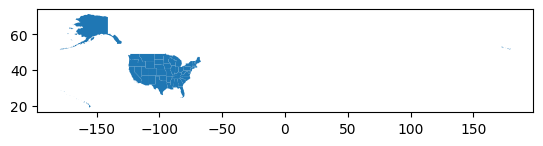

In [255]:
gdf.plot()

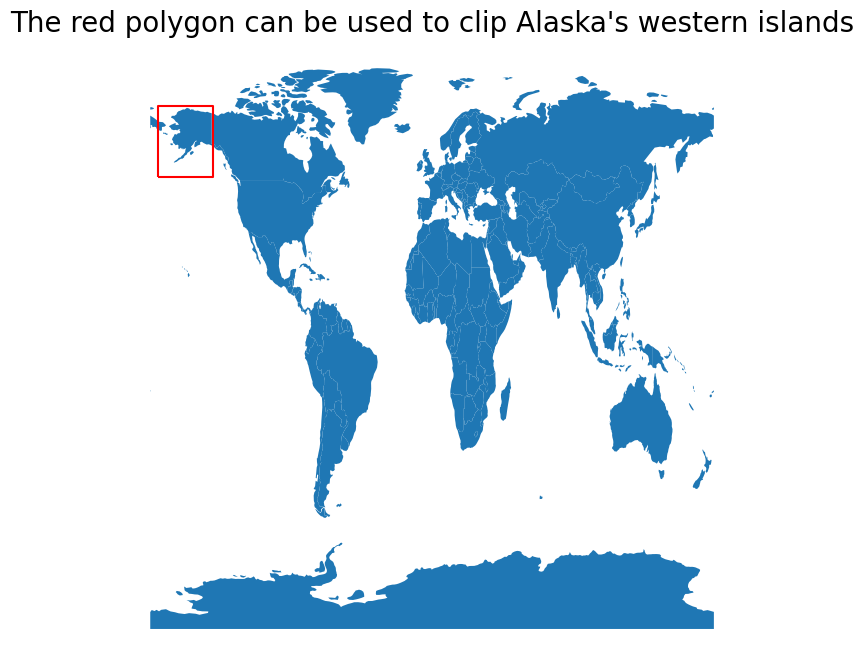

In [256]:
world = gpd.read_file('/Users/keriwilkins/Downloads/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# NOTE: the convention for polygon points is (Long, Lat)....counterintuitive
polygon = Polygon([(-175,50),(-175,72),(-140, 72),(-140,50)])
# polygon = Polygon([(-180,0),(-180,90),(-120,90),(-120,0)])

# polygon=hipolygon
poly_gdf = gpd.GeoDataFrame( geometry=[polygon], crs=world.crs)

fig, ax1 = plt.subplots(1, figsize=(8, 18))
world.plot(ax=ax1)
poly_gdf.boundary.plot(ax = ax1, color="red")
ax1.set_title("The red polygon can be used to clip Alaska's western islands", fontsize=20)
ax1.set_axis_off()
plt.show()

<Axes: >

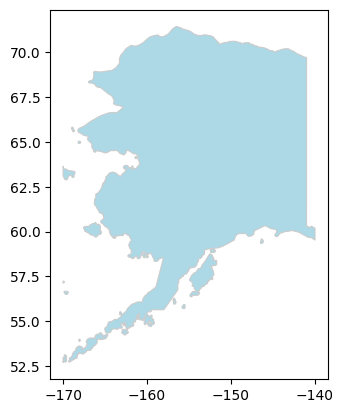

In [257]:
# Define your polygon
polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])

# Apply clipping
clipped_alaska = gdf.clip(polygon)

# Plot the clipped geometry
clipped_alaska.plot(color='lightblue', linewidth=0.8, edgecolor='0.8')

In [258]:
category_mapping = {
    "Adequate Plus": 90,
    "Adequate": 70,
    "Intermediate": 50,
    "Inadequate": 30
}

# Map the categorical values to numerical values in the DataFrame column
gdf['APNCU Score Numerical'] = gdf['APNCU Score'].map(category_mapping)

# Check if the mapping was successful
print(gdf[['APNCU Score', 'APNCU Score Numerical']].head())

     APNCU Score  APNCU Score Numerical
0  Adequate Plus                     90
1     Inadequate                     30
2   Intermediate                     50
3   Intermediate                     50
4     Inadequate                     30


In [259]:
gdf = gdf.to_crs(epsg=4326)

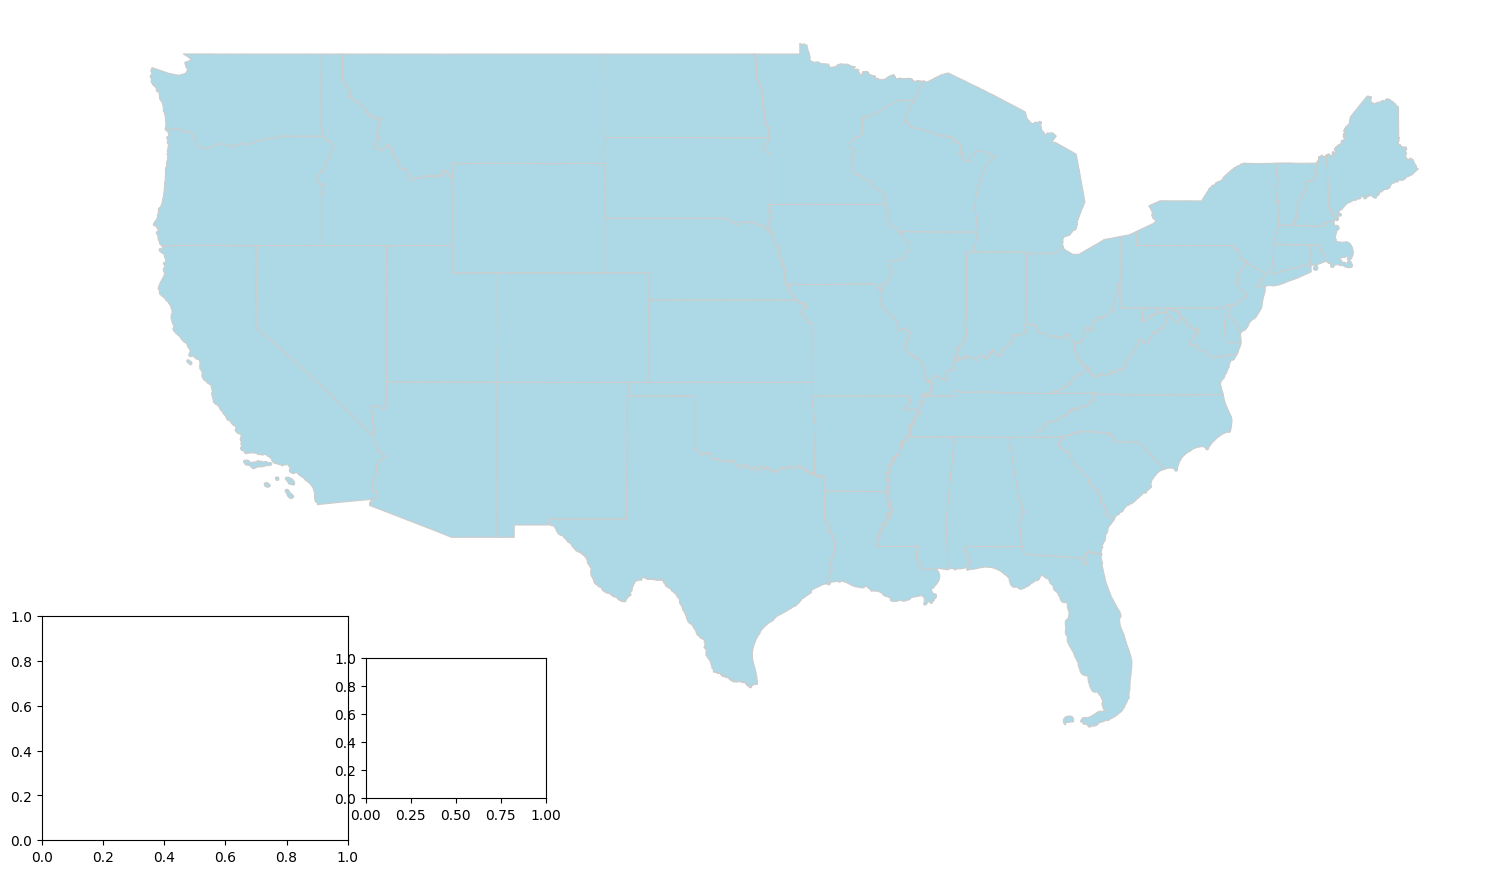

In [260]:
# Create a "copy" of gdf for re-projecting
gdf = gdf.to_crs('epsg:4326')

# create figure and axes for with Matplotlib for main map
fig, ax = plt.subplots(1, figsize=(18, 14))
# remove the axis box from the main map
ax.axis('off')


# create map of all states except AK and HI in the main map axis
gdf[~gdf.STUSPS.isin(['HI','AK'])].plot(color='lightblue', linewidth=0.8, ax=ax, edgecolor='0.8')


# Add Alaska Axis (x, y, width, height)
akax = fig.add_axes([0.1, 0.17, 0.17, 0.16])   


# Add Hawaii Axis(x, y, width, height)
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])   

# We'll later map Alaska in "akax" and Hawaii in "hiax"

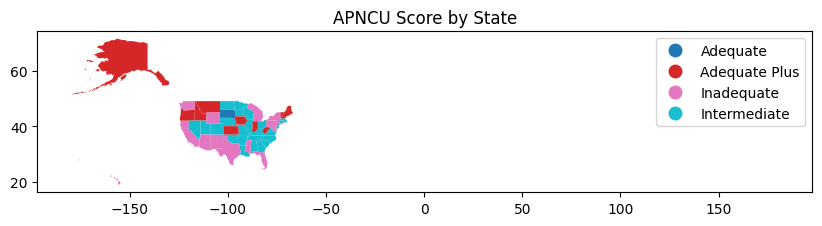

In [261]:
gdf.plot(column='APNCU Score', legend=True, figsize=(10, 8))
ax.axis('off') 
plt.title('APNCU Score by State')
plt.show()

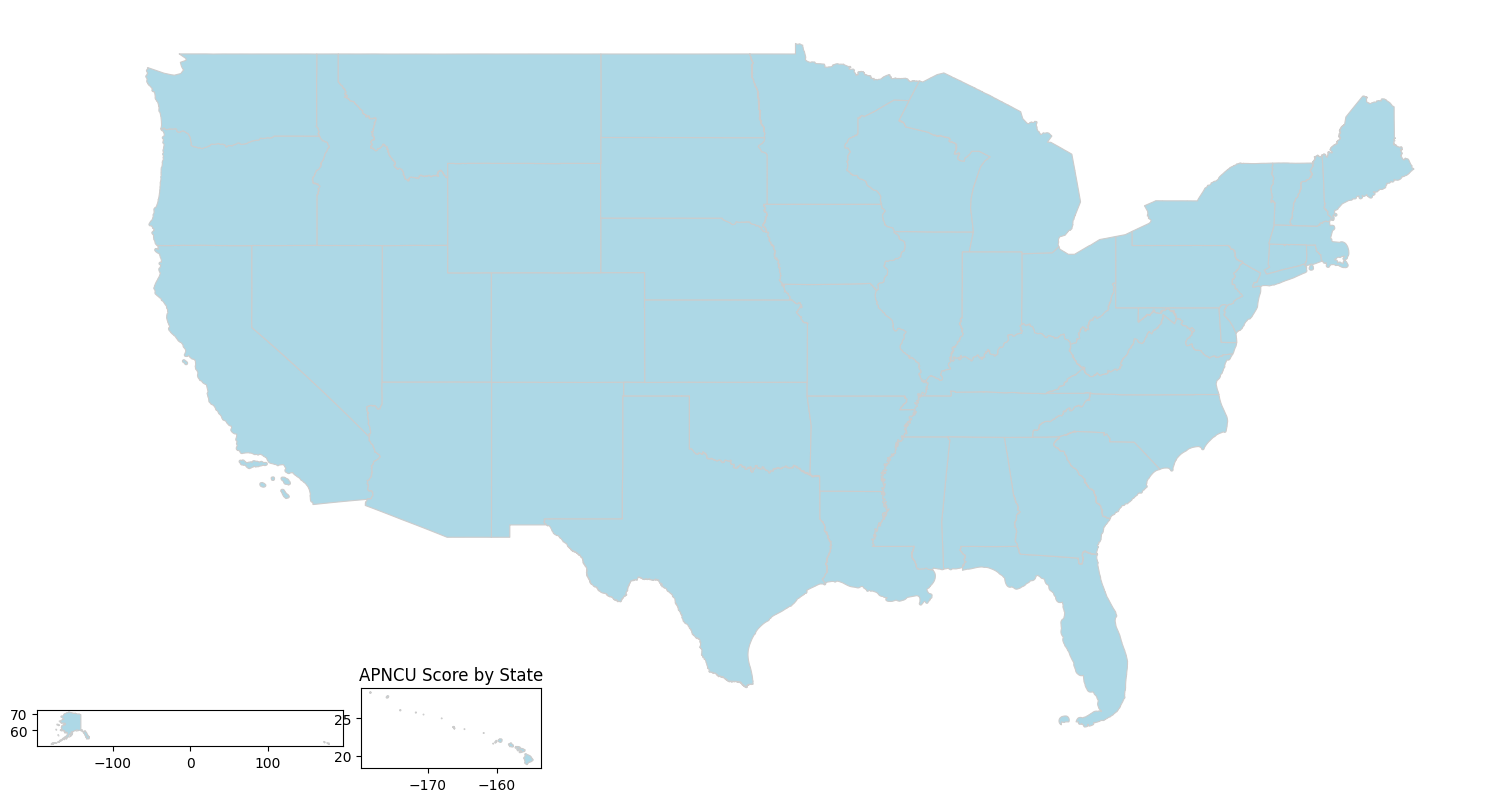

In [262]:
fig, ax = plt.subplots(figsize=(18, 14))
ax.axis('off')  # Remove the axis box from the main map

# Plot all states except Alaska and Hawaii in the main map axis
gdf[~gdf.STUSPS.isin(['HI', 'AK'])].plot(color='lightblue', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Alaska Axis (x, y, width, height)
akax = fig.add_axes([0.1, 0.17, 0.17, 0.16])

# Plot Alaska in the Alaska axis
gdf[gdf.STUSPS == 'AK'].plot(color='lightblue', linewidth=0.8, ax=akax, edgecolor='0.8')

# Add Hawaii Axis (x, y, width, height)
hiax = fig.add_axes([0.28, 0.20, 0.1, 0.1])

# Plot Hawaii in the Hawaii axis
gdf[gdf.STUSPS == 'HI'].plot(color='lightblue', linewidth=0.8, ax=hiax, edgecolor='0.8')

# Set the title
plt.title('APNCU Score by State')

# Show the plot
plt.show()

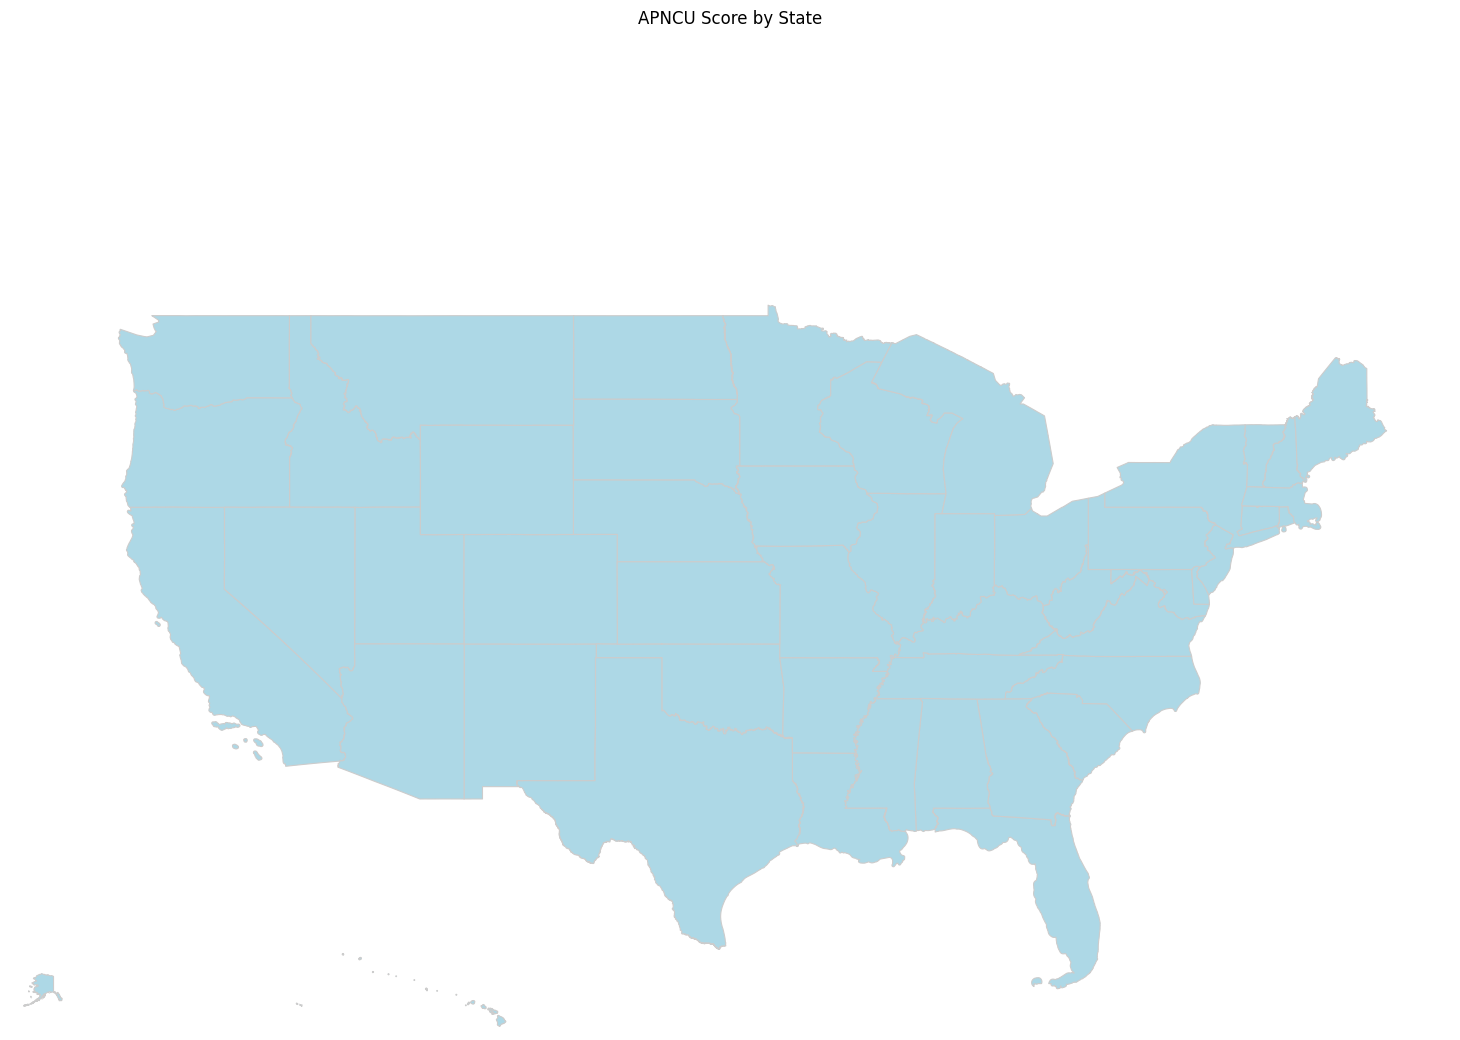

In [263]:
fig, ax = plt.subplots(figsize=(18, 14))
ax.axis('off')  # Remove the axis box from the main map

# Plot all states except Alaska and Hawaii in the main map axis
gdf[~gdf.STUSPS.isin(['HI', 'AK'])].plot(color='lightblue', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Alaska Axis (x, y, width, height)
akax = fig.add_axes([0.1, 0.17, 0.17, 0.16])
akax.axis('off')

# Plot Alaska in the Alaska axis
gdf[gdf.STUSPS == 'AK'].plot(color='lightblue', linewidth=0.8, ax=akax, edgecolor='0.8')

# Add Hawaii Axis (x, y, width, height)
hiax = fig.add_axes([0.1, 0.17, 0.17, 0.16])
hiax.axis('off')

# Plot Hawaii in the Hawaii axis
gdf[gdf.STUSPS == 'HI'].plot(color='lightblue', linewidth=0.8, ax=hiax, edgecolor='0.8')

# Adjust Hawaii position
hiax.set_position([0.28, 0.20, 0.1, 0.1])

# Set the title outside of the boxes
fig.suptitle('APNCU Score by State', y=0.95)

# Show the plot
plt.show()

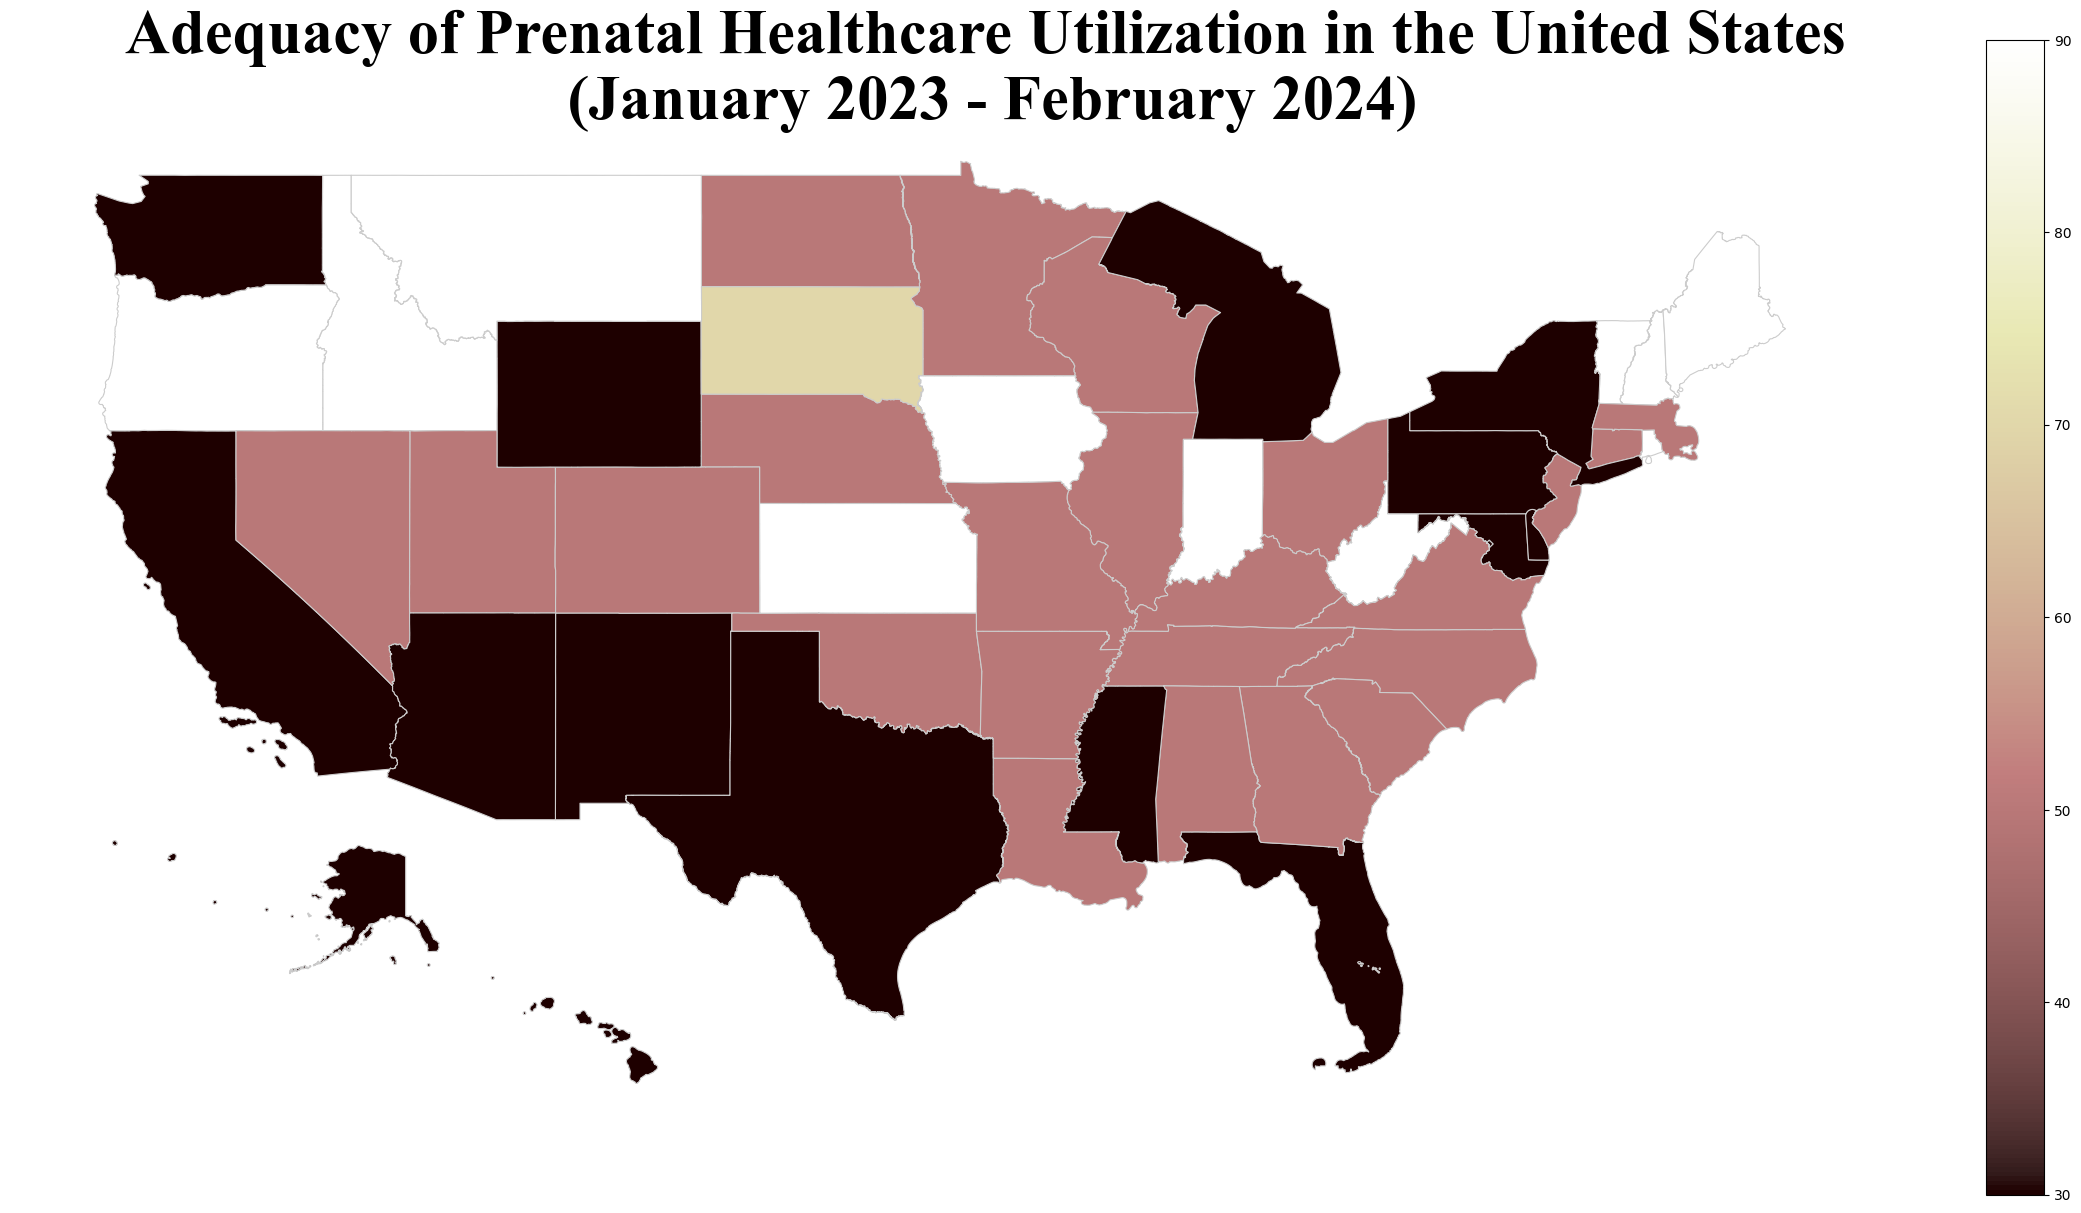

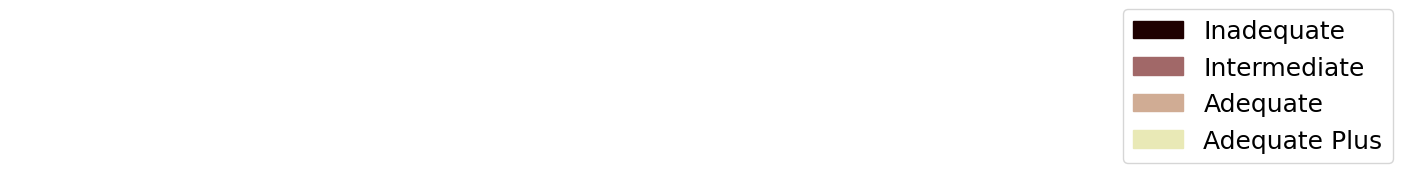

In [322]:
fig, ax = plt.subplots(figsize=(30, 15))
ax.axis('off')# Remove the axis box from the main map

# Plot all states except Alaska and Hawaii in the main map axis with APNCU Score Numerical
gdf[~gdf.STUSPS.isin(['HI', 'AK'])].plot(column='APNCU Score Numerical', cmap='pink', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add Alaska Axis (x, y, width, height) - Increase width and height
akax = fig.add_axes([0.2, 0.2, 0.4, 0.2])
akax.axis('off')

# Plot Alaska in the Alaska axis
gdf[gdf.STUSPS == 'AK'].plot(column='APNCU Score Numerical', cmap='pink', linewidth=0.8, ax=akax, edgecolor='0.8', legend=False)

# Add Hawaii Axis (x, y, width, height) - Increase width and height
hiax = fig.add_axes([0.28, 0.22, 0.2, 0.2])
hiax.axis('off')

# Plot Hawaii in the Hawaii axis
gdf[gdf.STUSPS == 'HI'].plot(column='APNCU Score Numerical', cmap='pink', linewidth=0.8, ax=hiax, edgecolor='0.8', legend=False)

# Adjust Hawaii position
hiax.set_position([0.15, 0.12, 0.2, 0.29])

# Set the title outside of the boxes with increased font size
fig.suptitle('Adequacy of Prenatal Healthcare Utilization in the United States\n (January 2023 - February 2024)', y=0.9, x=0.45, fontsize= 45, fontweight='bold', fontname='Times New Roman')

cmap = plt.get_cmap('pink')

# Generate colors from the colormap based on the numerical values
category_colors = {category: cmap(value/100) for category, value in category_mapping.items()}

# Create a legend with colored dots using the generated colors
legend_handles = []
for category, color in category_colors.items():
    legend_handles = [mpatches.Patch(color=cmap(i/len(category_mapping)), label=category) for i, category in enumerate(reversed(category_mapping))]

# Create the plot
fig, ax = plt.subplots(figsize=(18, 14))
ax.axis('off')


# Add the legend
plt.legend(handles=legend_handles, loc='lower right', fontsize=18)

plt.subplots_adjust(bottom=0.8)
plt.savefig('APNCU_by_state.png')


# Plot the map of the United States
plt.show()

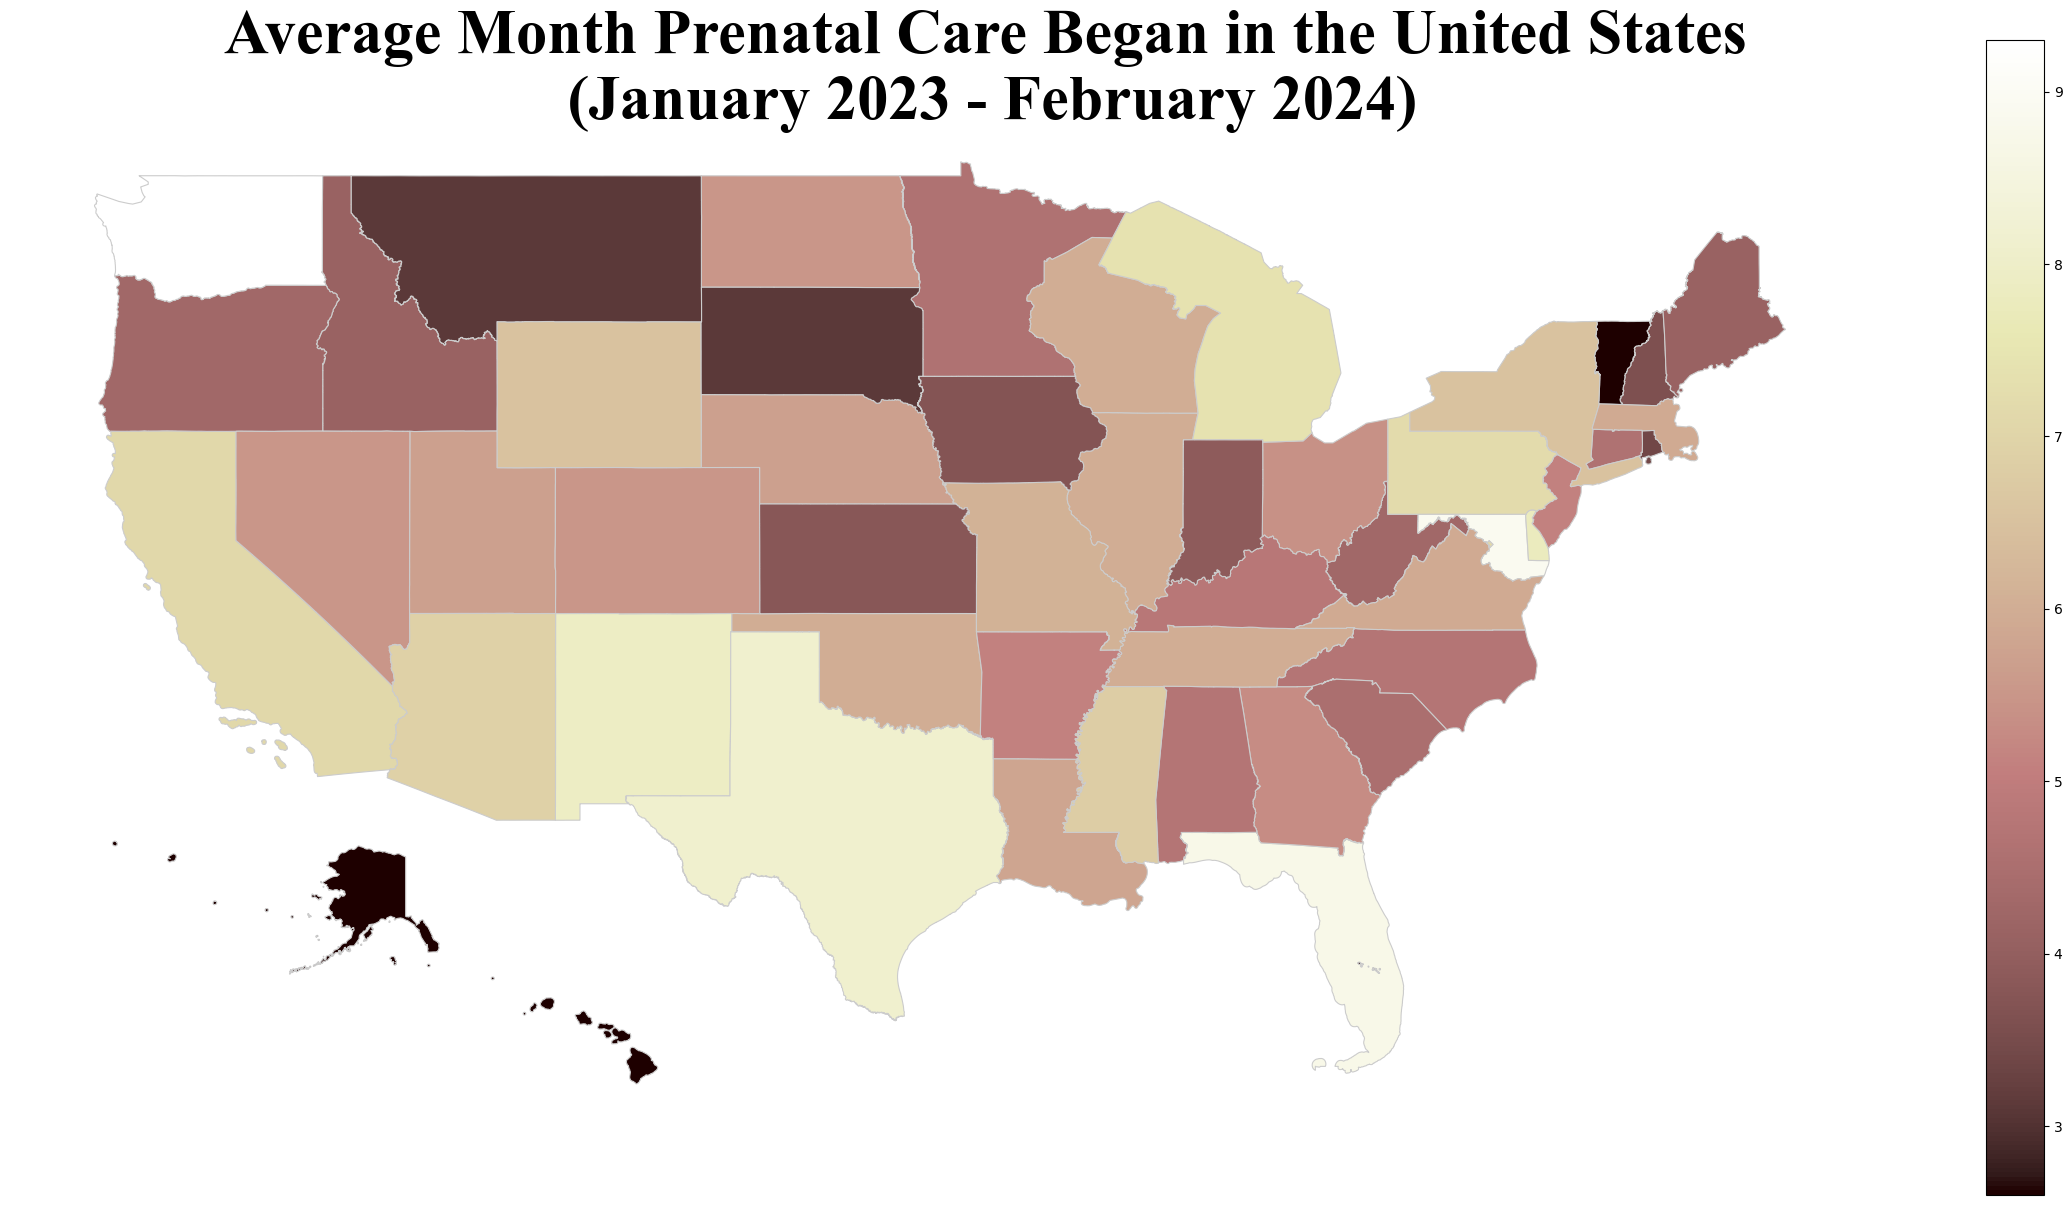

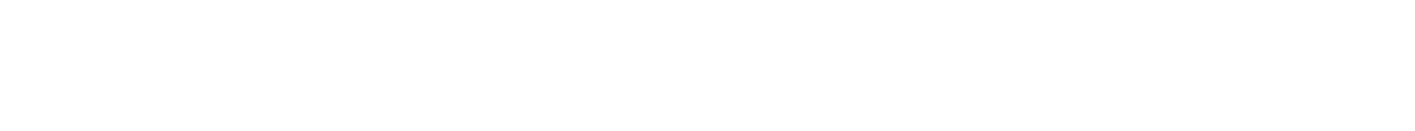

In [308]:
fig, ax = plt.subplots(figsize=(30, 15))
ax.axis('off')# Remove the axis box from the main map

# Plot all states except Alaska and Hawaii in the main map axis with APNCU Score Numerical
gdf[~gdf.STUSPS.isin(['HI', 'AK'])].plot(column='Average Month Prenatal Care Began', cmap='pink', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add Alaska Axis (x, y, width, height) - Increase width and height
akax = fig.add_axes([0.2, 0.2, 0.4, 0.2])
akax.axis('off')

# Plot Alaska in the Alaska axis
gdf[gdf.STUSPS == 'AK'].plot(column='Average Month Prenatal Care Began', cmap='pink', linewidth=0.8, ax=akax, edgecolor='0.8', legend=False)

# Add Hawaii Axis (x, y, width, height) - Increase width and height
hiax = fig.add_axes([0.28, 0.22, 0.2, 0.2])
hiax.axis('off')

# Plot Hawaii in the Hawaii axis
gdf[gdf.STUSPS == 'HI'].plot(column='Average Month Prenatal Care Began', cmap='pink', linewidth=0.8, ax=hiax, edgecolor='0.8', legend=False)

# Adjust Hawaii position
hiax.set_position([0.15, 0.12, 0.2, 0.29])

# Set the title outside of the boxes with increased font size
fig.suptitle('Average Month Prenatal Care Began in the United States\n (January 2023 - February 2024)', y=0.9, x=0.45, fontsize= 45, fontweight='black', fontname='Times New Roman')

cmap = plt.get_cmap('pink')

# Generate colors from the colormap based on the numerical values
category_colors = {category: cmap(value/100) for category, value in category_mapping.items()}

# Create the plot
fig, ax = plt.subplots(figsize=(18, 14))
ax.axis('off')

plt.subplots_adjust(bottom=0.8)
plt.savefig('prenatal_began_of_mothers_by_state.png', transparent=True)

# Plot the map of the United States
plt.show()

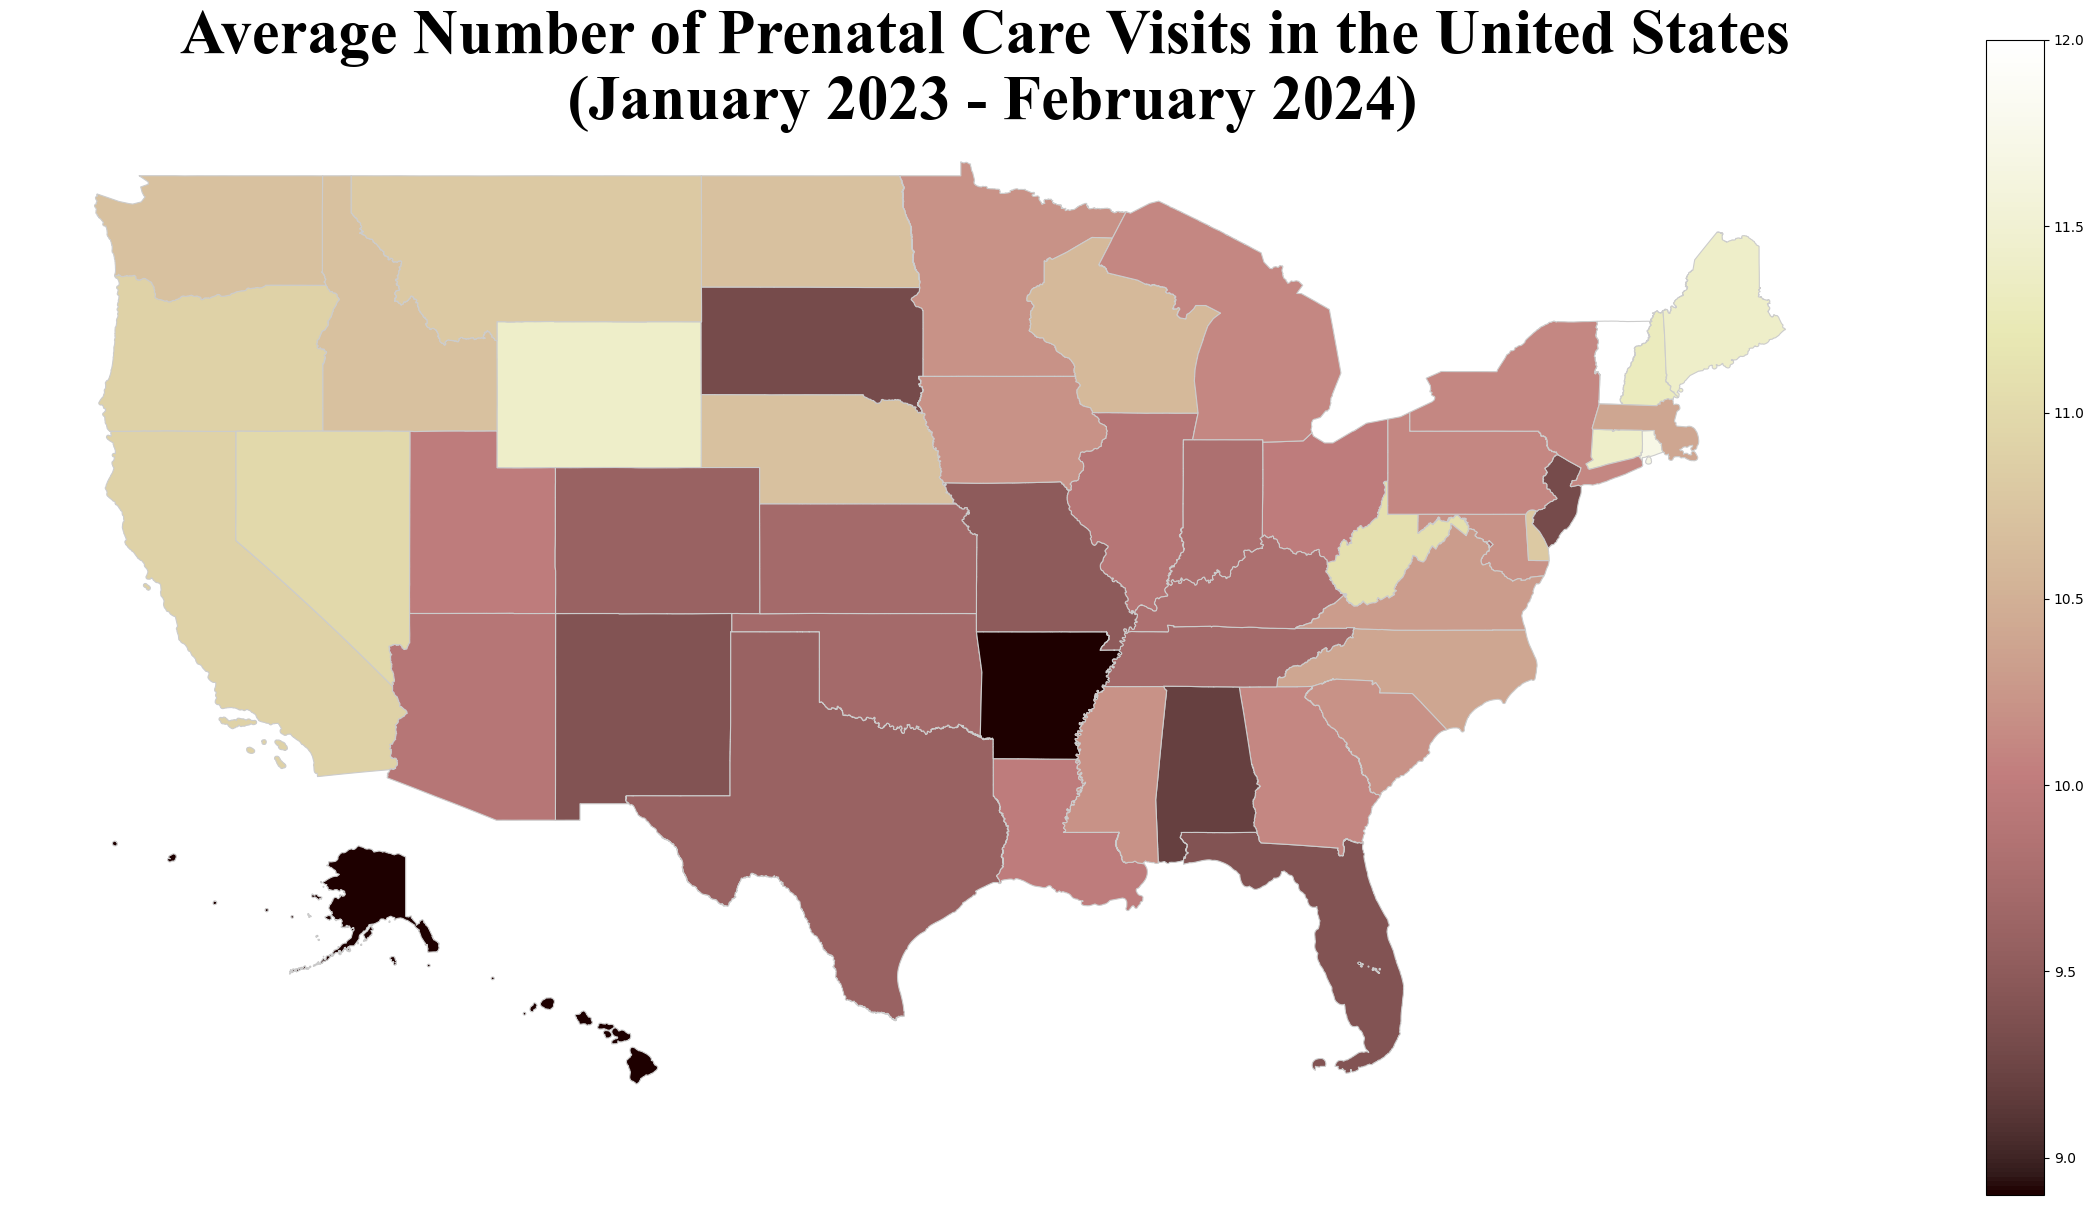

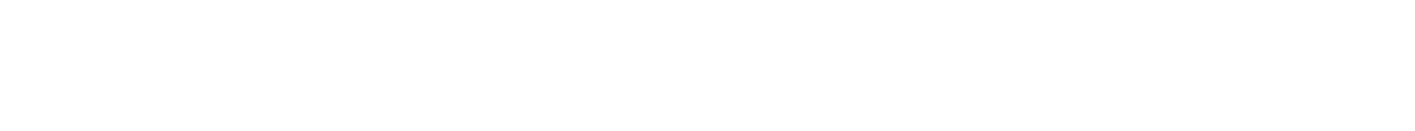

In [309]:
fig, ax = plt.subplots(figsize=(30, 15))
ax.axis('off')# Remove the axis box from the main map

# Plot all states except Alaska and Hawaii in the main map axis with APNCU Score Numerical
gdf[~gdf.STUSPS.isin(['HI', 'AK'])].plot(column='Average Number of Prenatal Visits', cmap='pink', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add Alaska Axis (x, y, width, height) - Increase width and height
akax = fig.add_axes([0.2, 0.2, 0.4, 0.2])
akax.axis('off')

# Plot Alaska in the Alaska axis
gdf[gdf.STUSPS == 'AK'].plot(column='Average Number of Prenatal Visits', cmap='pink', linewidth=0.8, ax=akax, edgecolor='0.8', legend=False)

# Add Hawaii Axis (x, y, width, height) - Increase width and height
hiax = fig.add_axes([0.28, 0.22, 0.2, 0.2])
hiax.axis('off')

# Plot Hawaii in the Hawaii axis
gdf[gdf.STUSPS == 'HI'].plot(column='Average Number of Prenatal Visits', cmap='pink', linewidth=0.8, ax=hiax, edgecolor='0.8', legend=False)

# Adjust Hawaii position
hiax.set_position([0.15, 0.12, 0.2, 0.29])

# Set the title outside of the boxes with increased font size
fig.suptitle('Average Number of Prenatal Care Visits in the United States\n (January 2023 - February 2024)', y=0.9, x=0.45, fontsize= 45, color='black', fontweight='bold', fontname='Times New Roman')

cmap = plt.get_cmap('pink')

# Generate colors from the colormap based on the numerical values
category_colors = {category: cmap(value/100) for category, value in category_mapping.items()}

# Create the plot
fig, ax = plt.subplots(figsize=(18, 14))
ax.axis('off')

plt.subplots_adjust(bottom=0.8)
# Plot the map of the United States

plt.savefig('prenatal_visits_of_mothers_by_state.png', transparent=True)

plt.show()

In [267]:
new_raw_data = pd.read_excel('/Users/keriwilkins/Library/CloudStorage/OneDrive-Personal/Documents/Provisional Natality - 2023 through 02-29-24-V4.xlsx')

In [268]:
print(new_raw_data)

      State of Residence Maternal Morbidity Checked  \
0                Alabama       At least one checked   
1                Alabama               None checked   
2                Alabama               None checked   
3                Alabama               None checked   
4                Alabama               None checked   
...                  ...                        ...   
22472                NaN                        NaN   
22473                NaN                        NaN   
22474                NaN                        NaN   
22475                NaN                        NaN   
22476                NaN                        NaN   

       Maternal Morbidity Checked Code Source of Payment for Delivery  
0                                  0.0                       Medicaid  
1                                  1.0              Private Insurance  
2                                  1.0                       Self Pay  
3                                  1.0             

In [269]:
final_data = pd.merge(raw_data, new_raw_data, on='State of Residence', how='left')


In [270]:
print(final_data)

         State of Residence  State of Residence Code Mother's Single Race 15  \
0                   Alabama                      1.0                   White   
1                   Alabama                      1.0                   White   
2                   Alabama                      1.0                   White   
3                   Alabama                      1.0                   White   
4                   Alabama                      1.0                   White   
...                     ...                      ...                     ...   
13738092            Wyoming                     56.0      More than one race   
13738093            Wyoming                     56.0      More than one race   
13738094            Wyoming                     56.0      More than one race   
13738095            Wyoming                     56.0      More than one race   
13738096            Wyoming                     56.0      More than one race   

          Mother's Single Race 15 Code 

In [271]:
inadequate_states = APNCU_index_categories_df[APNCU_index_categories_df['APNCU Score'] == 'Inadequate']['State of Residence']
adequate_plus_states = APNCU_index_categories_df[APNCU_index_categories_df['APNCU Score'].str.contains('Adequate Plus')]['State of Residence']

# Print the list of states in each category
print("States with Inadequate Prenatal Care:")
print(inadequate_states.tolist())

print("\nStates with Adequate Plus Prenatal Care:")
print(adequate_plus_states.tolist())

States with Inadequate Prenatal Care:
['Arizona', 'California', 'Delaware', 'District of Columbia', 'Florida', 'Hawaii', 'Maryland', 'Michigan', 'Mississippi', 'New Mexico', 'New York', 'Pennsylvania', 'Texas', 'Washington', 'Wyoming']

States with Adequate Plus Prenatal Care:
['Alaska', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Maine', 'Montana', 'New Hampshire', 'Oregon', 'Rhode Island', 'Vermont', 'West Virginia']


In [272]:
# Filter the rows where 'Maternal Morbidity Checked' is 'At least one checked'
maternal_morbidity_checked = new_raw_data[new_raw_data['Maternal Morbidity Checked'] == 'At least one checked']

# Group by 'State of Residence' and count the occurrences
maternal_morbidity_counts = maternal_morbidity_checked.groupby('State of Residence').size().reset_index(name='Maternal Morbidity Count')

# Merge with the population data
maternal_morbidity_counts = maternal_morbidity_counts.merge(population_data, on='State of Residence', how='left')

# Calculate normalized count per 1000 births
maternal_morbidity_counts['Morbidity Count per 1000 Births'] = maternal_morbidity_counts['Maternal Morbidity Count'] / normalized_raw_data[2023] * 1000

# Merge with the original DataFrame to add the normalized count column
normalized_raw_data = normalized_raw_data.merge(maternal_morbidity_counts[['State of Residence', 'Morbidity Count per 1000 Births']], on='State of Residence', how='left')

# Fill missing values with 0
normalized_raw_data['Morbidity Count per 1000 Births'] = normalized_raw_data['Morbidity Count per 1000 Births'].fillna(0)

In [273]:
# Filter maternal morbidity checked states from final_data based on inadequate and adequate plus categories
maternal_morbidity_inadequate = final_data[(final_data['State of Residence'].isin(inadequate_states)) & (final_data['Maternal Morbidity Checked'] == 'At least one checked')]
maternal_morbidity_adequate_plus = final_data[(final_data['State of Residence'].isin(adequate_plus_states)) & (final_data['Maternal Morbidity Checked'] == 'At least one checked')]

# Count occurrences of each state for both inadequate and adequate plus categories
inadequate_state_counts = maternal_morbidity_inadequate['State of Residence'].value_counts()
adequate_plus_state_counts = maternal_morbidity_adequate_plus['State of Residence'].value_counts()

# Get the list of states
inadequate_states_list = inadequate_state_counts.index.tolist()
adequate_plus_states_list = adequate_plus_state_counts.index.tolist()

# Get the counts of maternal morbidity for each state
inadequate_counts = [inadequate_state_counts[state] if state in inadequate_state_counts else 0 for state in inadequate_states_list]
adequate_plus_counts = [adequate_plus_state_counts[state] if state in adequate_plus_state_counts else 0 for state in adequate_plus_states_list]


In [274]:
maternal_morbidity_check = new_raw_data[new_raw_data['Maternal Morbidity Checked'] == 'At least one checked']

# Group by 'State of Residence' and count the occurrences
maternal_morbidity_counts = maternal_morbidity_checked.groupby('State of Residence').size().reset_index(name='Maternal Morbidity Count')

# Merge with the original DataFrame to add the normalized count column
final_data = final_data.merge(maternal_morbidity_counts, on='State of Residence', how='left')

# Fill missing values with 0
final_data['Maternal Morbidity Count'] = final_data['Maternal Morbidity Count'].fillna(0)

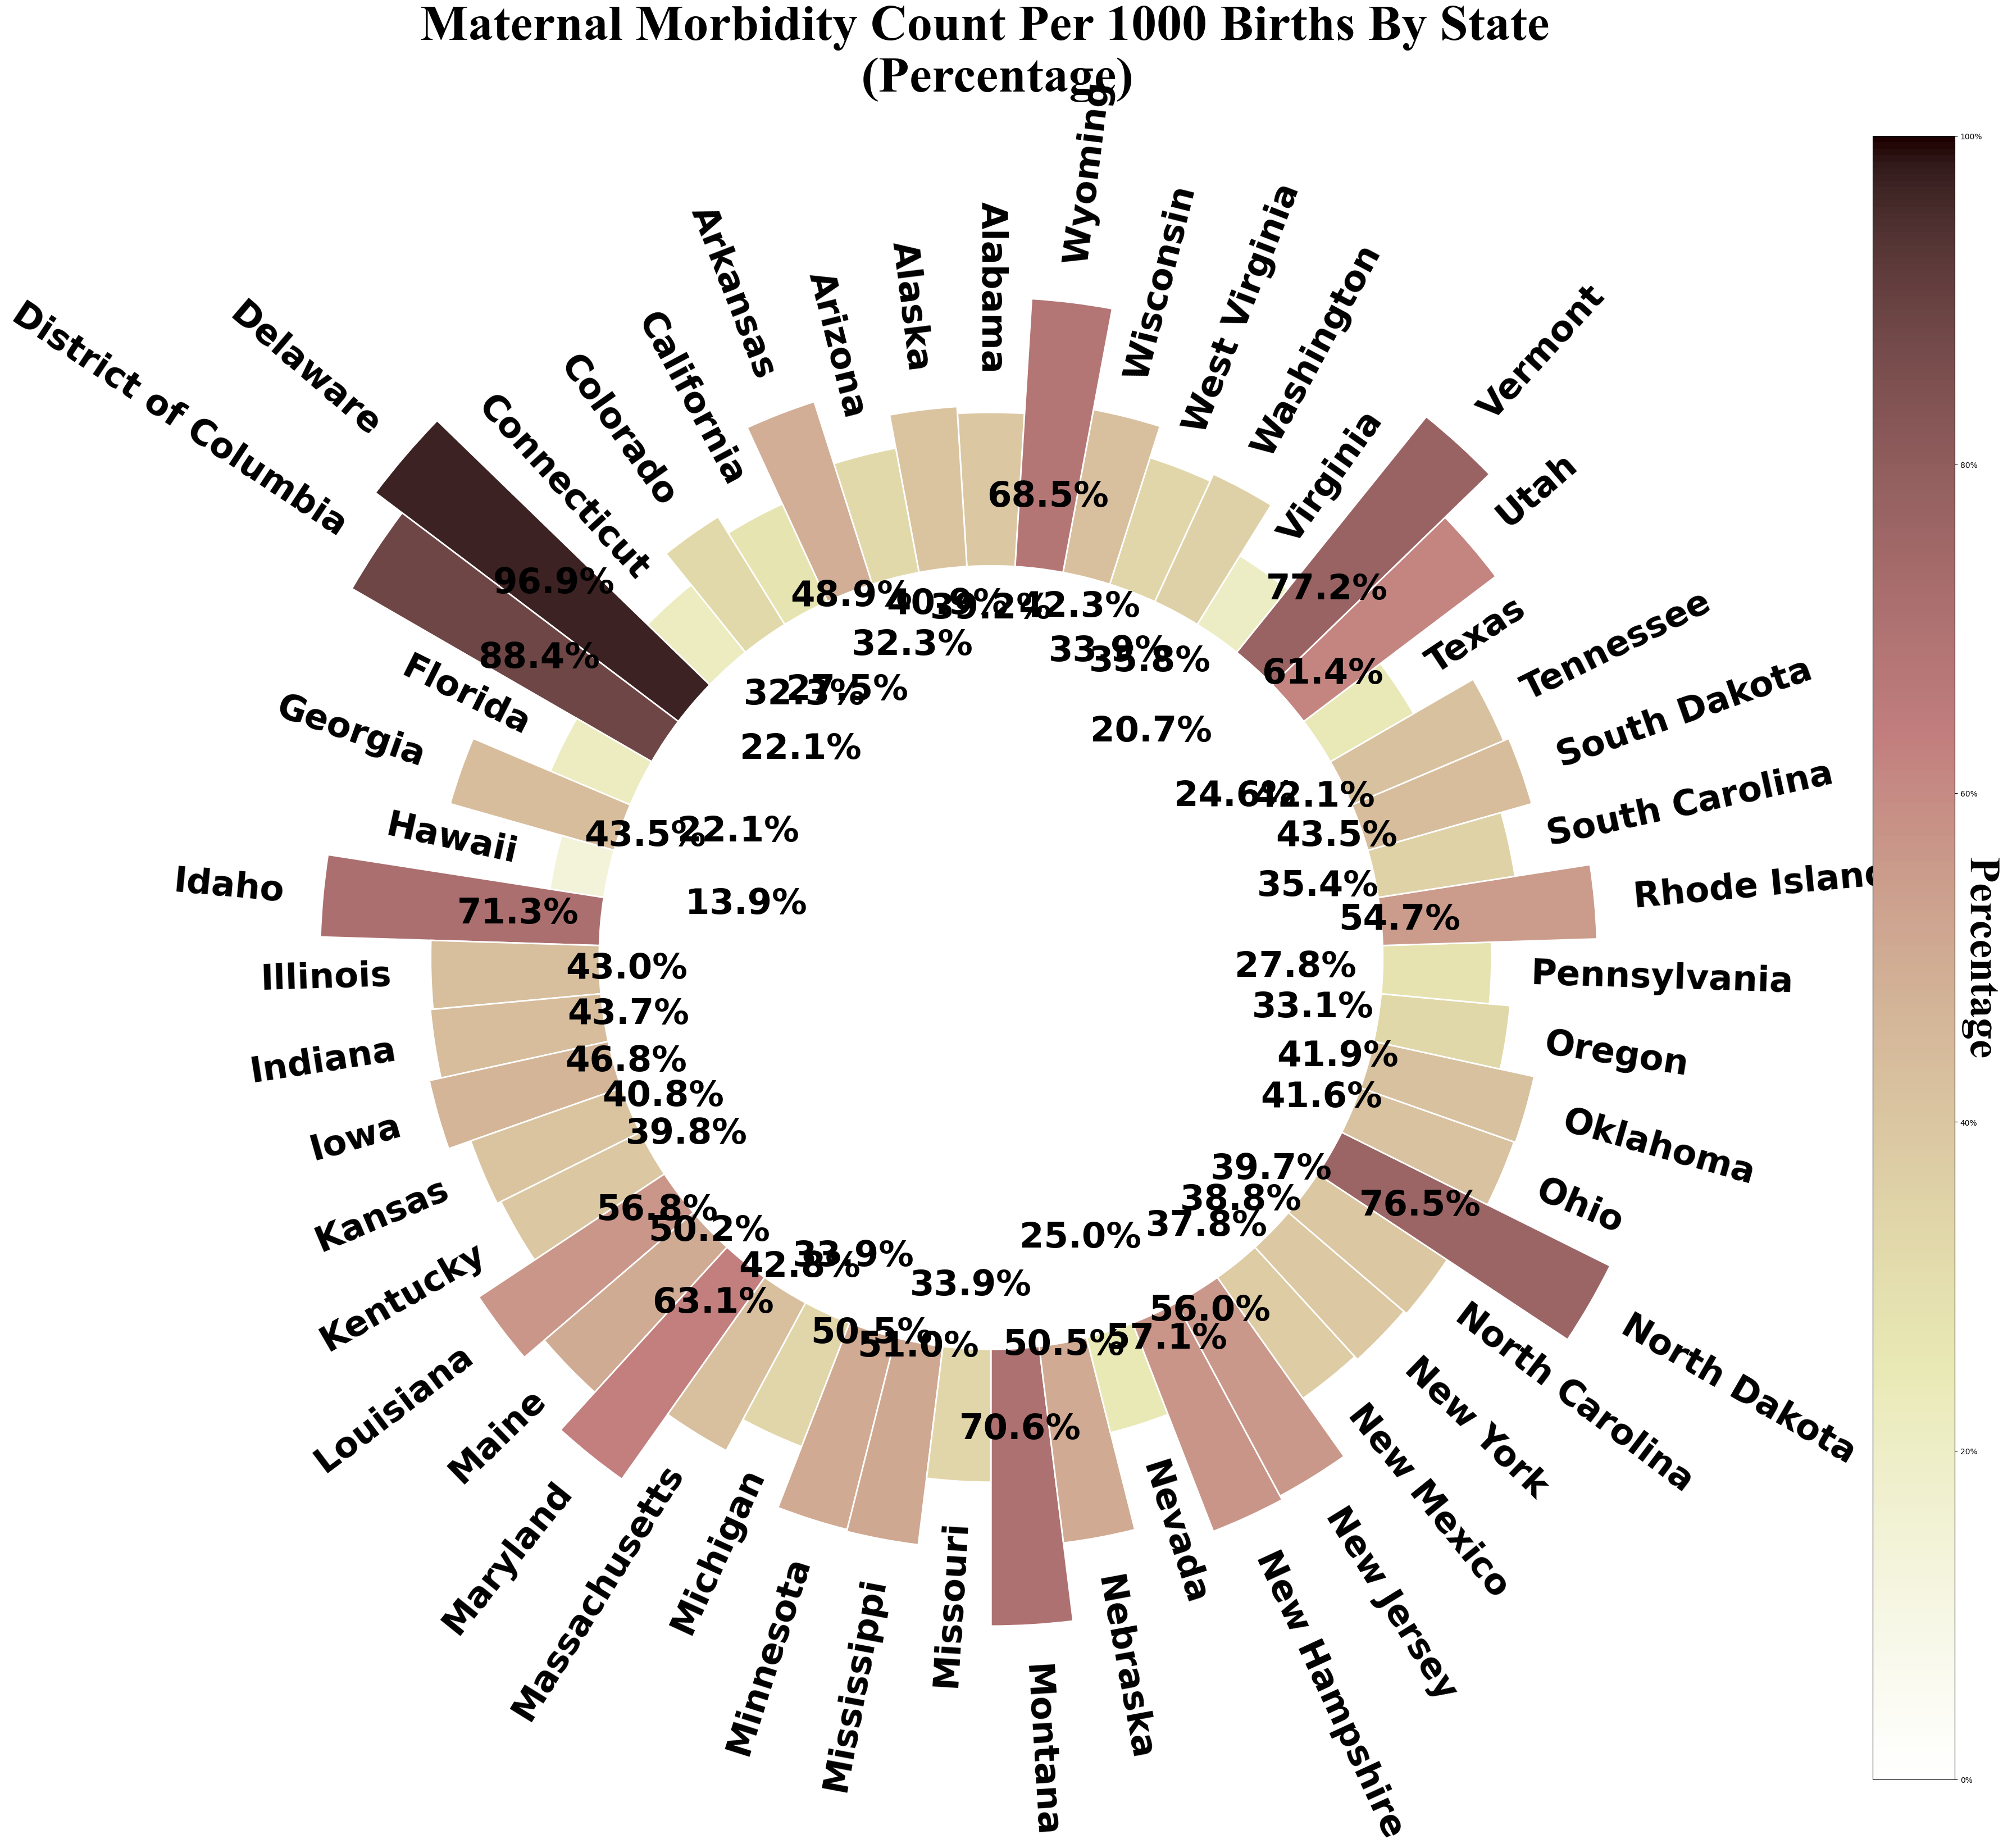

In [320]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

ANGLES = np.linspace(0, 2 * np.pi, len(normalized_raw_data), endpoint=False)
VALUES = normalized_raw_data['Morbidity Count per 1000 Births'].values * 100  # Increased scaling factor
LABELS = normalized_raw_data['State of Residence'].values
# Convert Morbidity Count Per 1000 Births to percentages
percentages = VALUES * 100

# Determine the width of each bar. 
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2 * np.pi / len(VALUES)

# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

# Initialize Figure and Axis
fig, ax = plt.subplots(figsize=(45, 38), subplot_kw={"projection": "polar"})

# Specify offset
ax.set_theta_offset(OFFSET)

# Set limits for radial (y) axis. The negative lower bound creates the whole in the middle.
ax.set_ylim(-100, 100)

# Remove all spines
ax.set_frame_on(False)

# Remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add labels
def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 10  # Change this value for different padding
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor",
            fontsize=45,
            fontweight='bold'
        )

# Add labels
add_labels(ANGLES, percentages, LABELS, OFFSET, ax)

# Add bars with colormap
bars = ax.bar(
    ANGLES, percentages, width=WIDTH, linewidth=2,
    color=plt.cm.pink_r(percentages / 100), edgecolor="white"
)

# Add percentages as text inside the circle
percentage_padding = -50  # Adjust this value for the desired padding
for angle, percentage in zip(ANGLES, percentages):
    ax.text(
        x=angle, 
        y=percentage + percentage_padding, 
        s=f'{percentage:.1f}%', 
        ha='center', 
        va='center', 
        fontsize=45,
        fontweight='bold',
        color='black'
    )

# Add colorbar legend
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='pink_r', norm=plt.Normalize(vmin=0, vmax=100)), ax=ax, format=ticker.PercentFormatter())
cbar.set_label('Percentage', rotation=270, labelpad=20, fontsize=55, fontweight='bold', fontname='Times New Roman')

plt.title('Maternal Morbidity Count Per 1000 Births By State \n (Percentage)', fontsize=65, fontweight='bold', fontname='Times New Roman', y=1.05)
plt.savefig('maternal_morbidity_of_mothers_by_state.png', transparent=True)

plt.show()


In [276]:
# Filter final_data to include only records where Maternal Morbidity Checked is 'At least one checked'
filtered_final_data = final_data[final_data['Maternal Morbidity Checked'] == 'At least one checked']

# Count the occurrences of each unique payment source by state
payment_source_counts = filtered_final_data.groupby(['State of Residence', 'Source of Payment for Delivery']).size().unstack(fill_value=0)

# Merge with normalized_raw_data to get population data
payment_source_data = pd.merge(payment_source_counts, normalized_raw_data[['State of Residence', 2023]], on='State of Residence')
    
for column in payment_source_counts.columns:
    payment_source_data[column] = payment_source_data[column] / payment_source_data[2023] * 100

# Display the result
print(payment_source_data )


      State of Residence  Medicaid     Other  Private Insurance  Self Pay  \
0                Alabama  0.062347  0.074817           0.099756  0.012469   
1                 Alaska  0.028497  0.056994           0.000000  0.000000   
2                Arizona  0.095380  0.059612           0.083457  0.035767   
3               Arkansas  0.046647  0.046647           0.077745  0.062196   
4             California  0.272931  0.055827           0.179886  0.124059   
5               Colorado  0.057166  0.057166           0.045733  0.034300   
6            Connecticut  0.024826  0.024826           0.037239  0.012413   
7               Delaware  0.044385  0.088769           0.066577  0.022192   
8   District of Columbia  0.029162  0.029162           0.087485  0.029162   
9                Florida  0.149062  0.027102           0.149062  0.013551   
10               Georgia  0.110343  0.143446           0.165515  0.099309   
11                Hawaii  0.024945  0.000000           0.024945  0.000000   

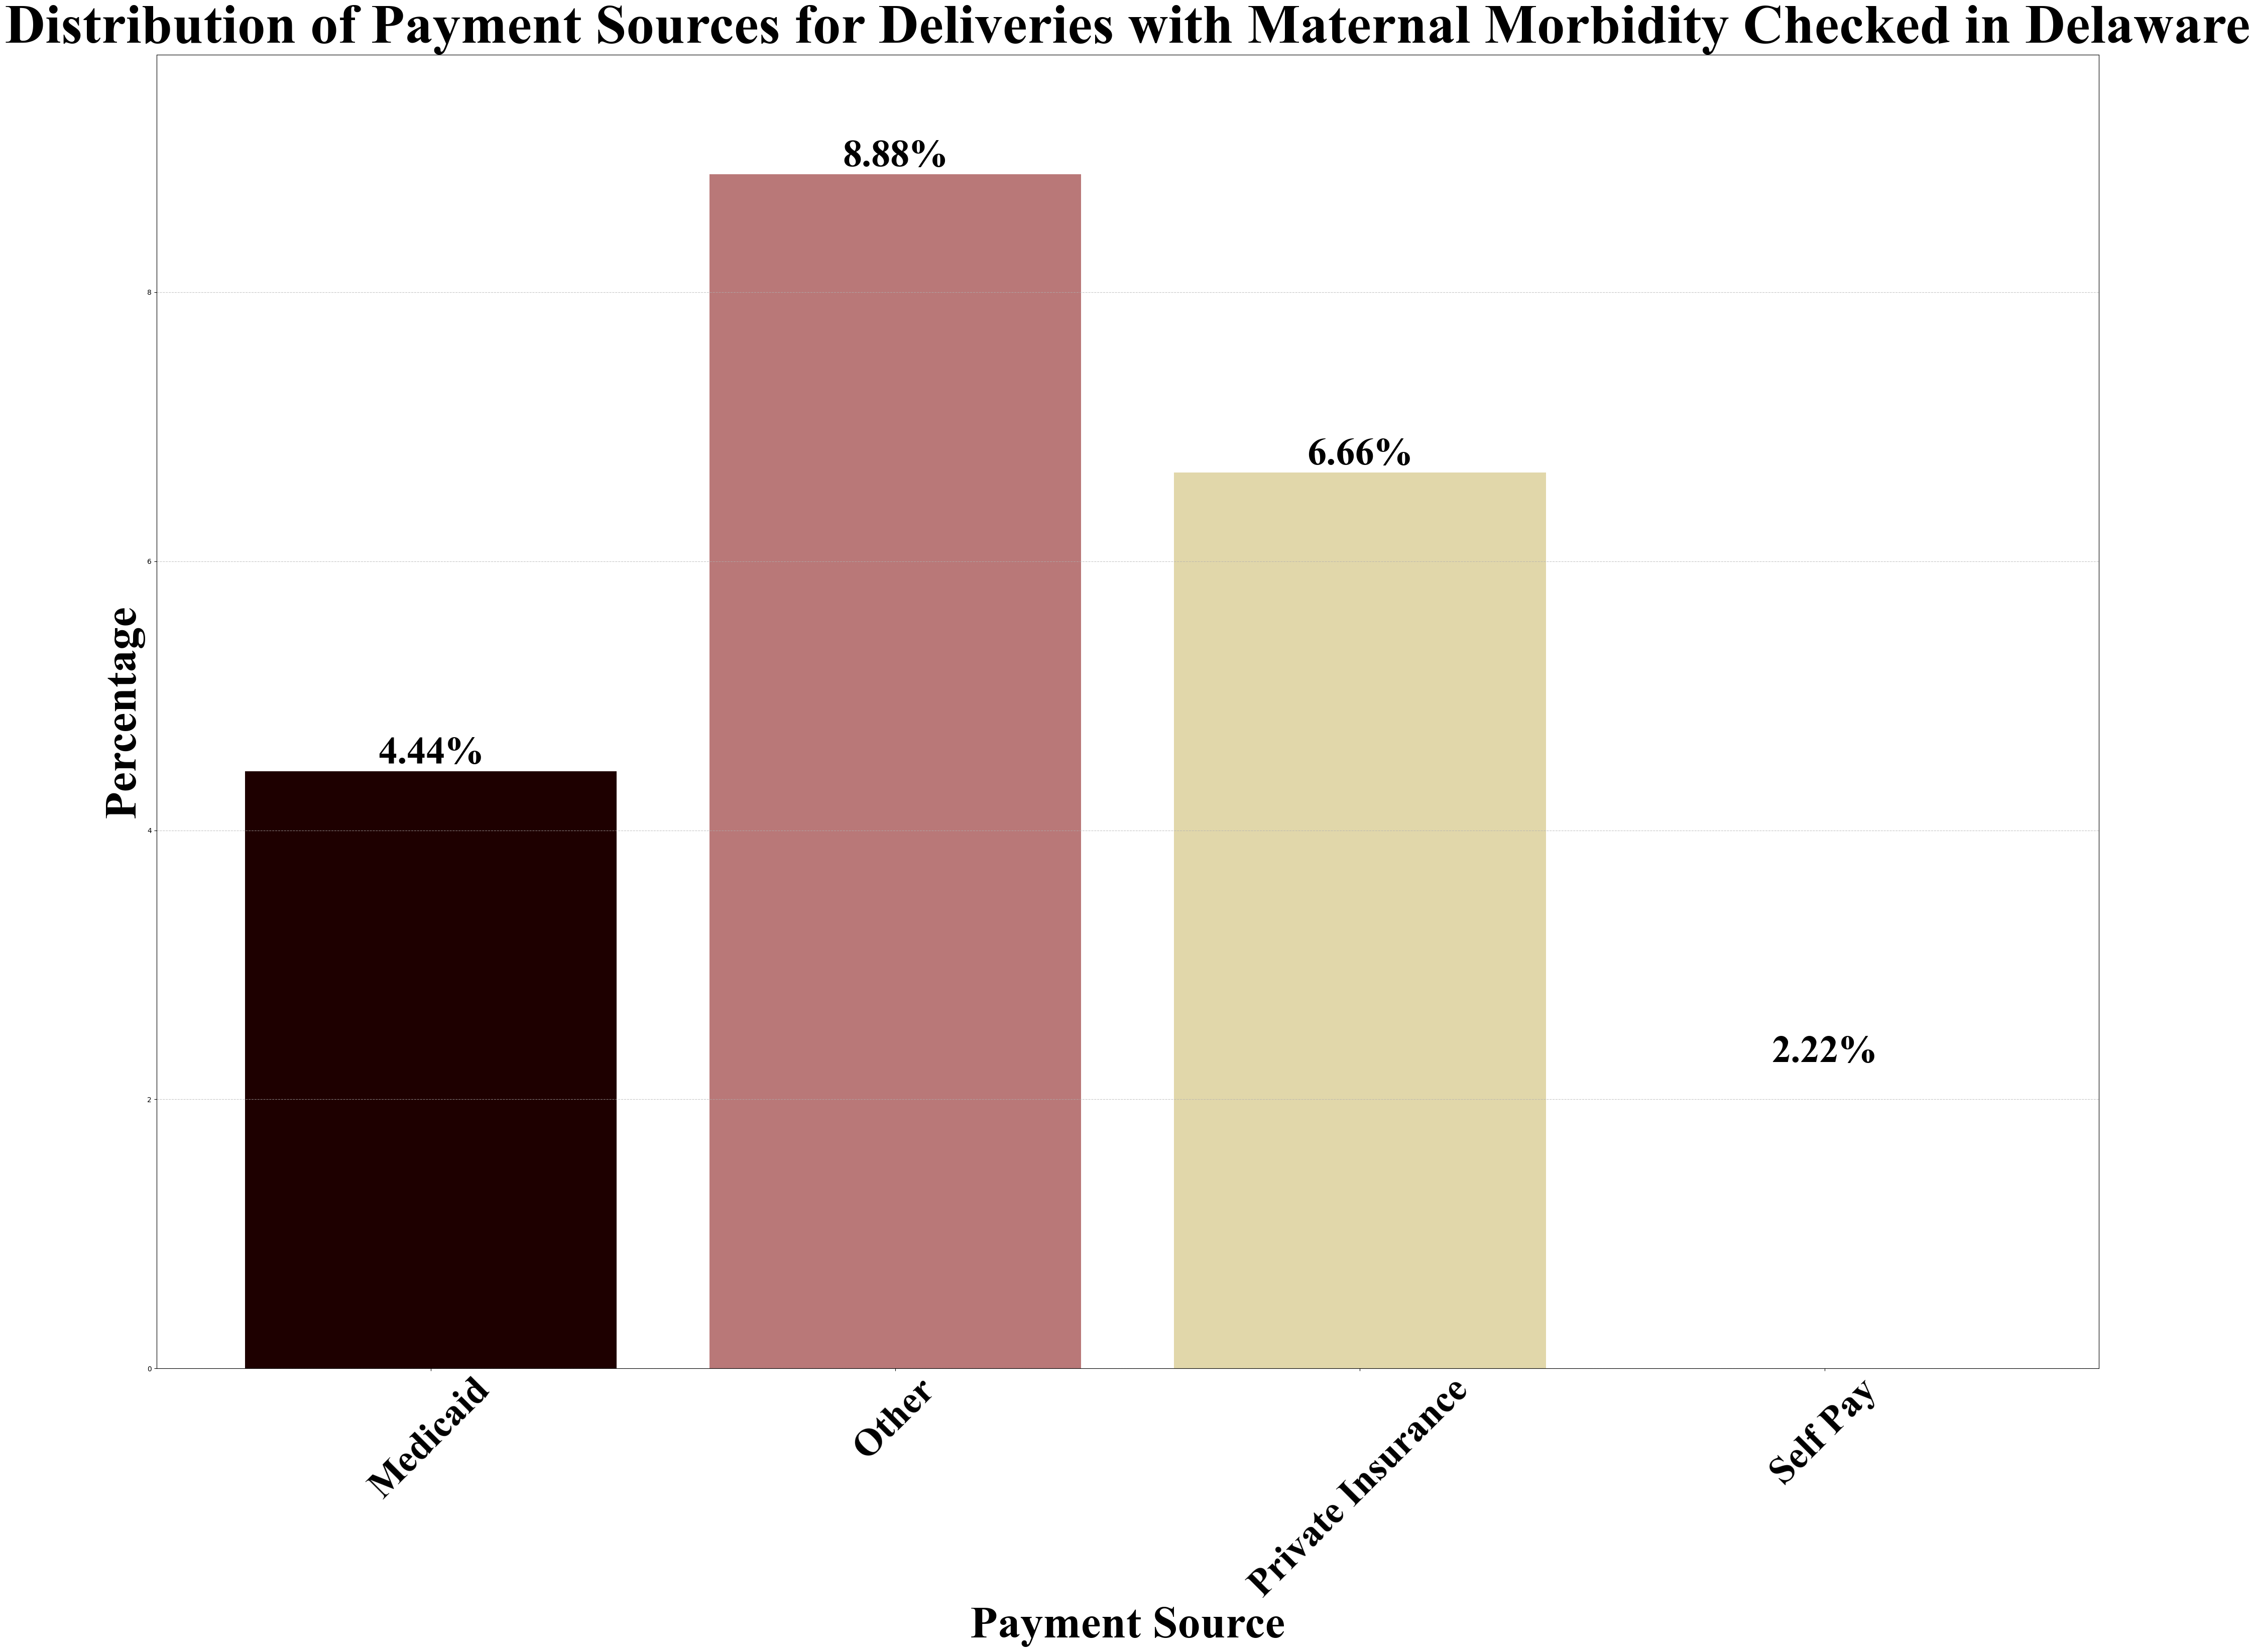

In [295]:
# Get the payment sources and their percentages for Delaware
percentages = payment_source_data[payment_source_data['State of Residence'] == 'Delaware'][['Medicaid', 'Other', 'Private Insurance', 'Self Pay']].values[0] * 100

# Define colors using a colormap
colors = plt.cm.pink(np.linspace(0, 1, len(percentages)))

# Plotting
plt.figure(figsize=(40, 33))
bars = plt.bar(['Medicaid', 'Other', 'Private Insurance', 'Self Pay'], percentages, color=colors)
plt.title('Distribution of Payment Sources for Deliveries with Maternal Morbidity Checked in Delaware', fontname='Times New Roman',fontsize=80, fontweight='bold', color='black')
plt.xlabel('Payment Source', fontsize=65, fontweight='bold', fontname='Times New Roman')
plt.ylabel('Percentage', fontsize=65, fontweight='bold', fontname='Times New Roman')
plt.ylim(0, max(percentages) * 1.1) # Setting y-axis limit to provide some padding
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=55, fontweight='bold', fontname='Times New Roman') # Rotate x-axis labels for better readability

for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=55, fontweight='bold', fontname='Times New Roman')

plt.tight_layout()
plt.savefig('payment_delaware.png', transparent=True)
plt.show()


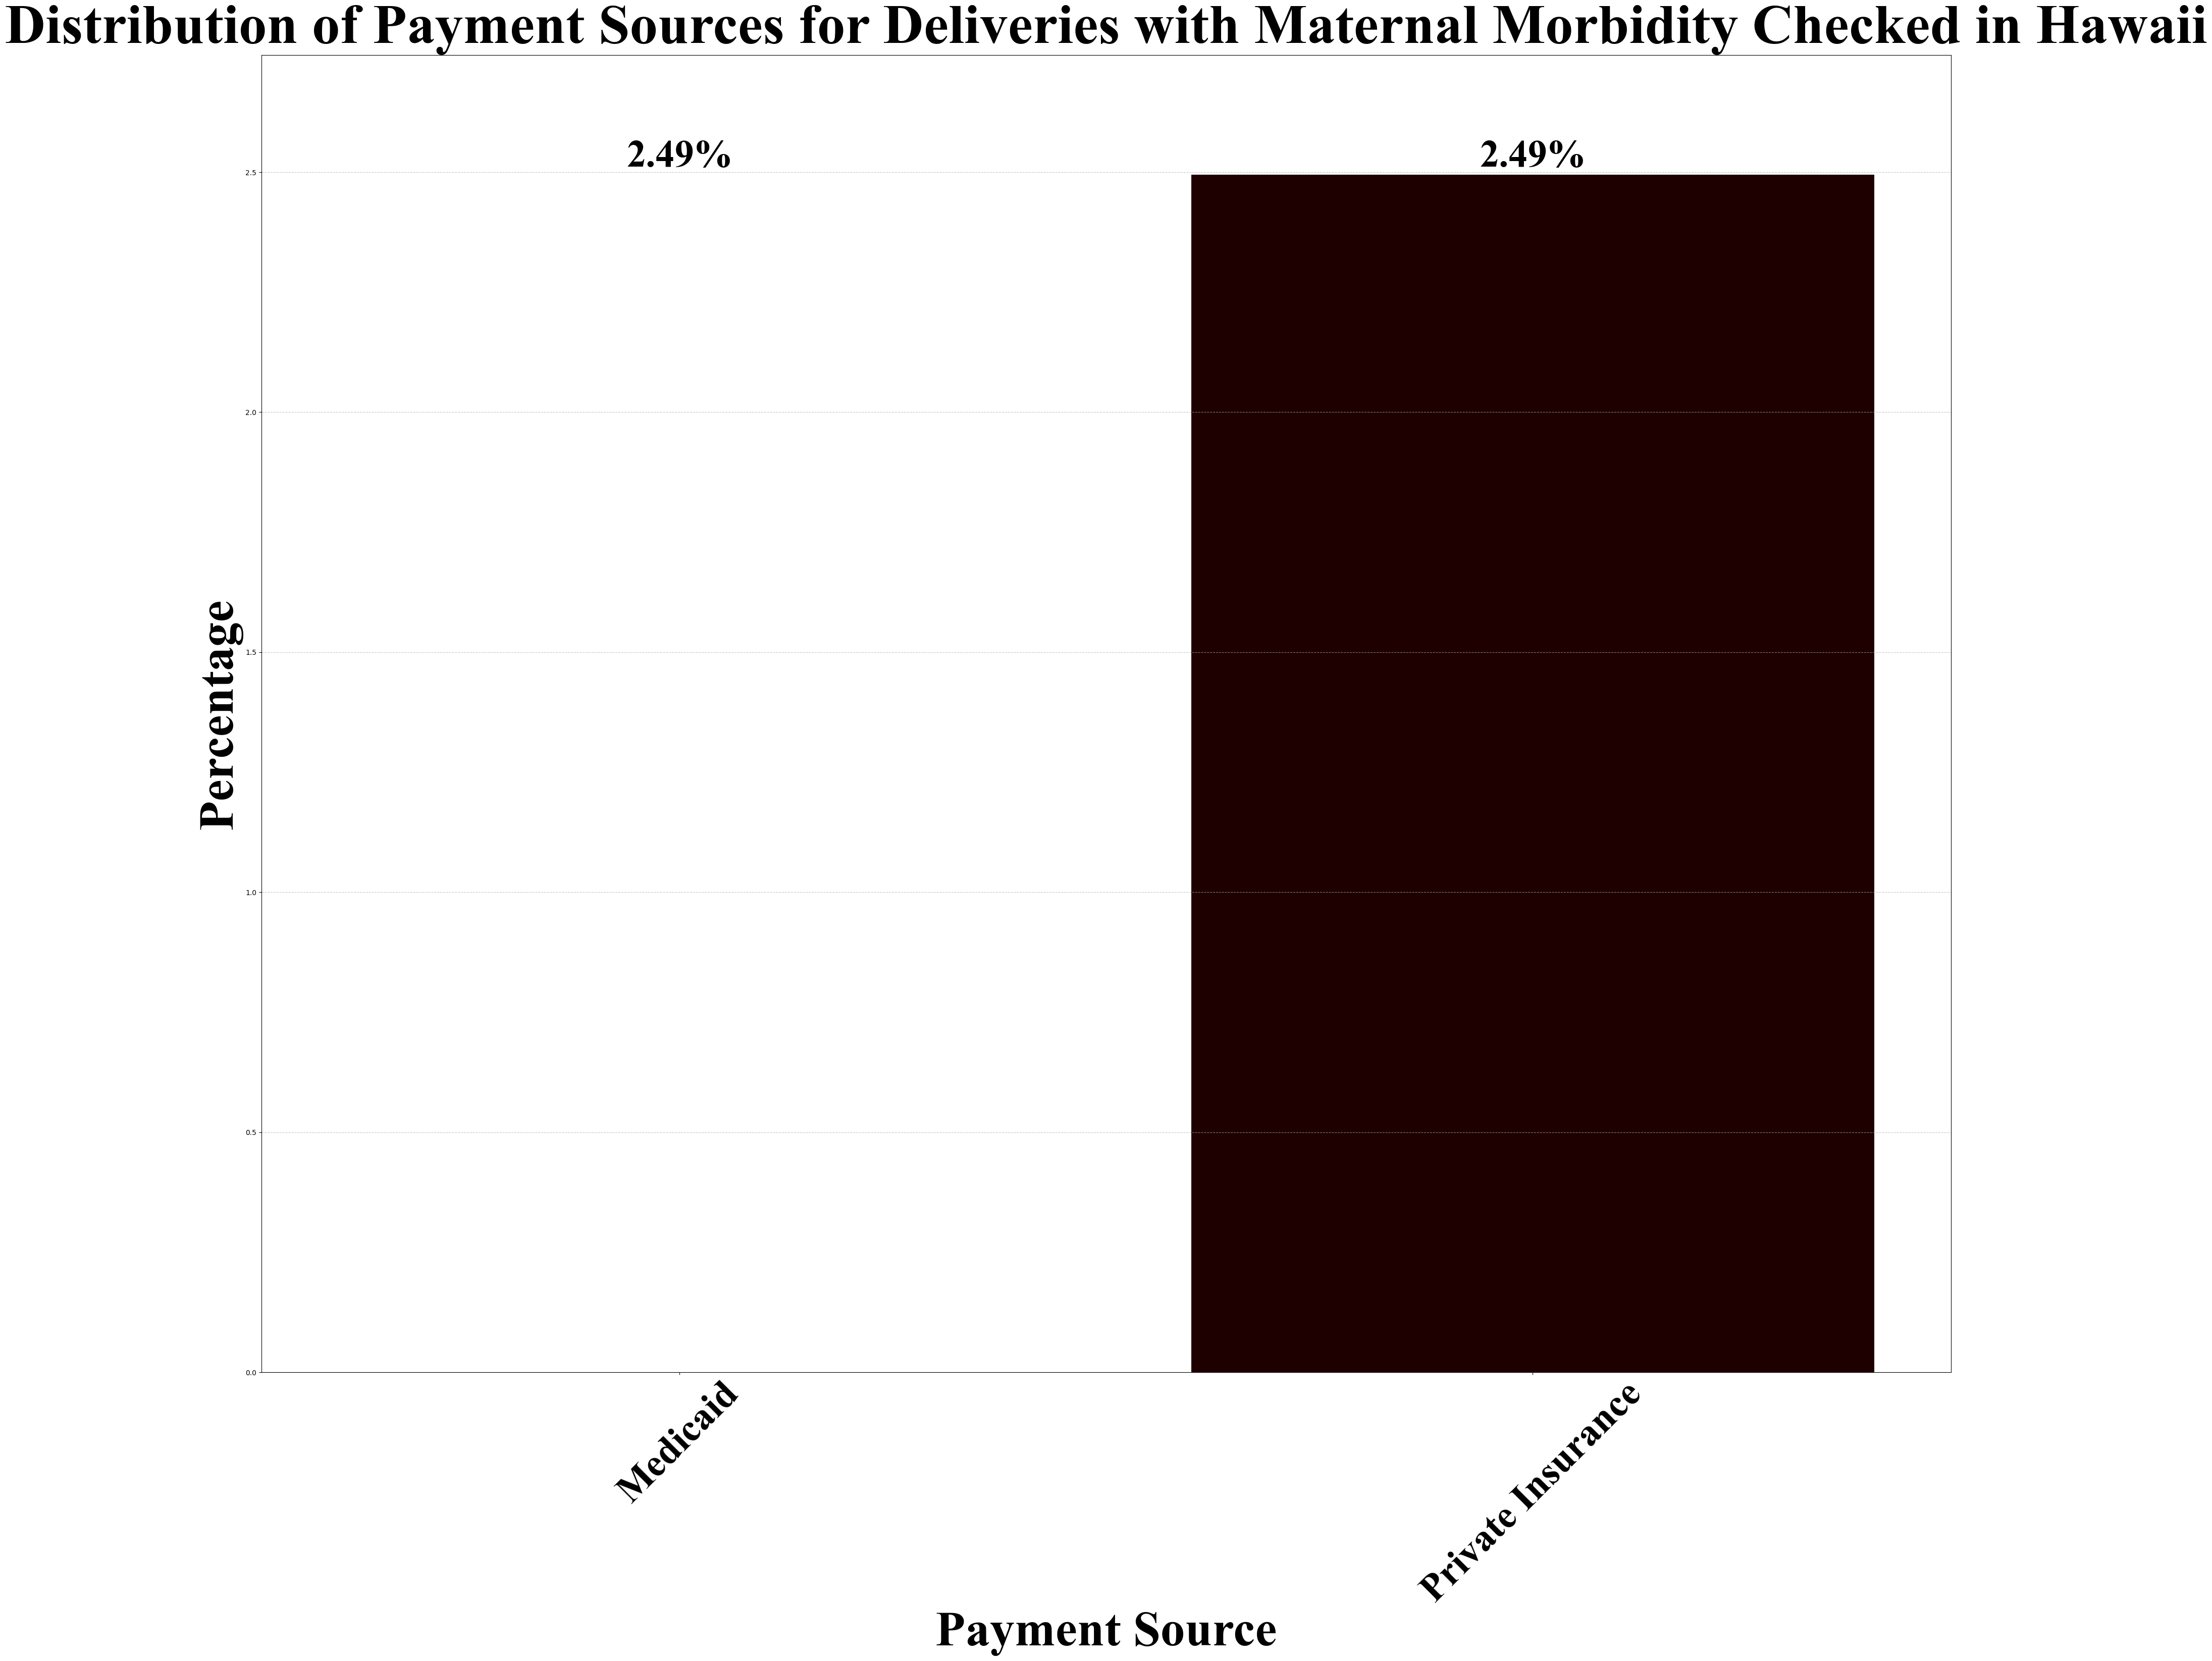

In [300]:
# Get the payment sources and their percentages for Delaware
percentages = payment_source_data[payment_source_data['State of Residence'] == 'Hawaii'][['Medicaid', 'Private Insurance']].values[0] * 100

# Define colors using a colormap
colors = plt.cm.pink_r(np.linspace(0, 1, len(percentages)))

# Plotting
plt.figure(figsize=(35, 33))
bars = plt.bar(['Medicaid', 'Private Insurance'], percentages, color=colors)
plt.title('Distribution of Payment Sources for Deliveries with Maternal Morbidity Checked in Hawaii', fontname='Times New Roman', fontsize=80, fontweight='bold', color='black')
plt.xlabel('Payment Source', fontsize=70, fontweight='bold', fontname='Times New Roman')
plt.ylabel('Percentage', fontsize=70, fontweight='bold', fontname='Times New Roman')
plt.ylim(0, max(percentages) * 1.1) # Setting y-axis limit to provide some padding
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=55, fontweight='bold', fontname='Times New Roman') # Rotate x-axis labels for better readability

for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=55, fontweight='bold', fontname='Times New Roman')

plt.tight_layout()
plt.savefig('payment_hawaii.png', transparent=True)
plt.show()


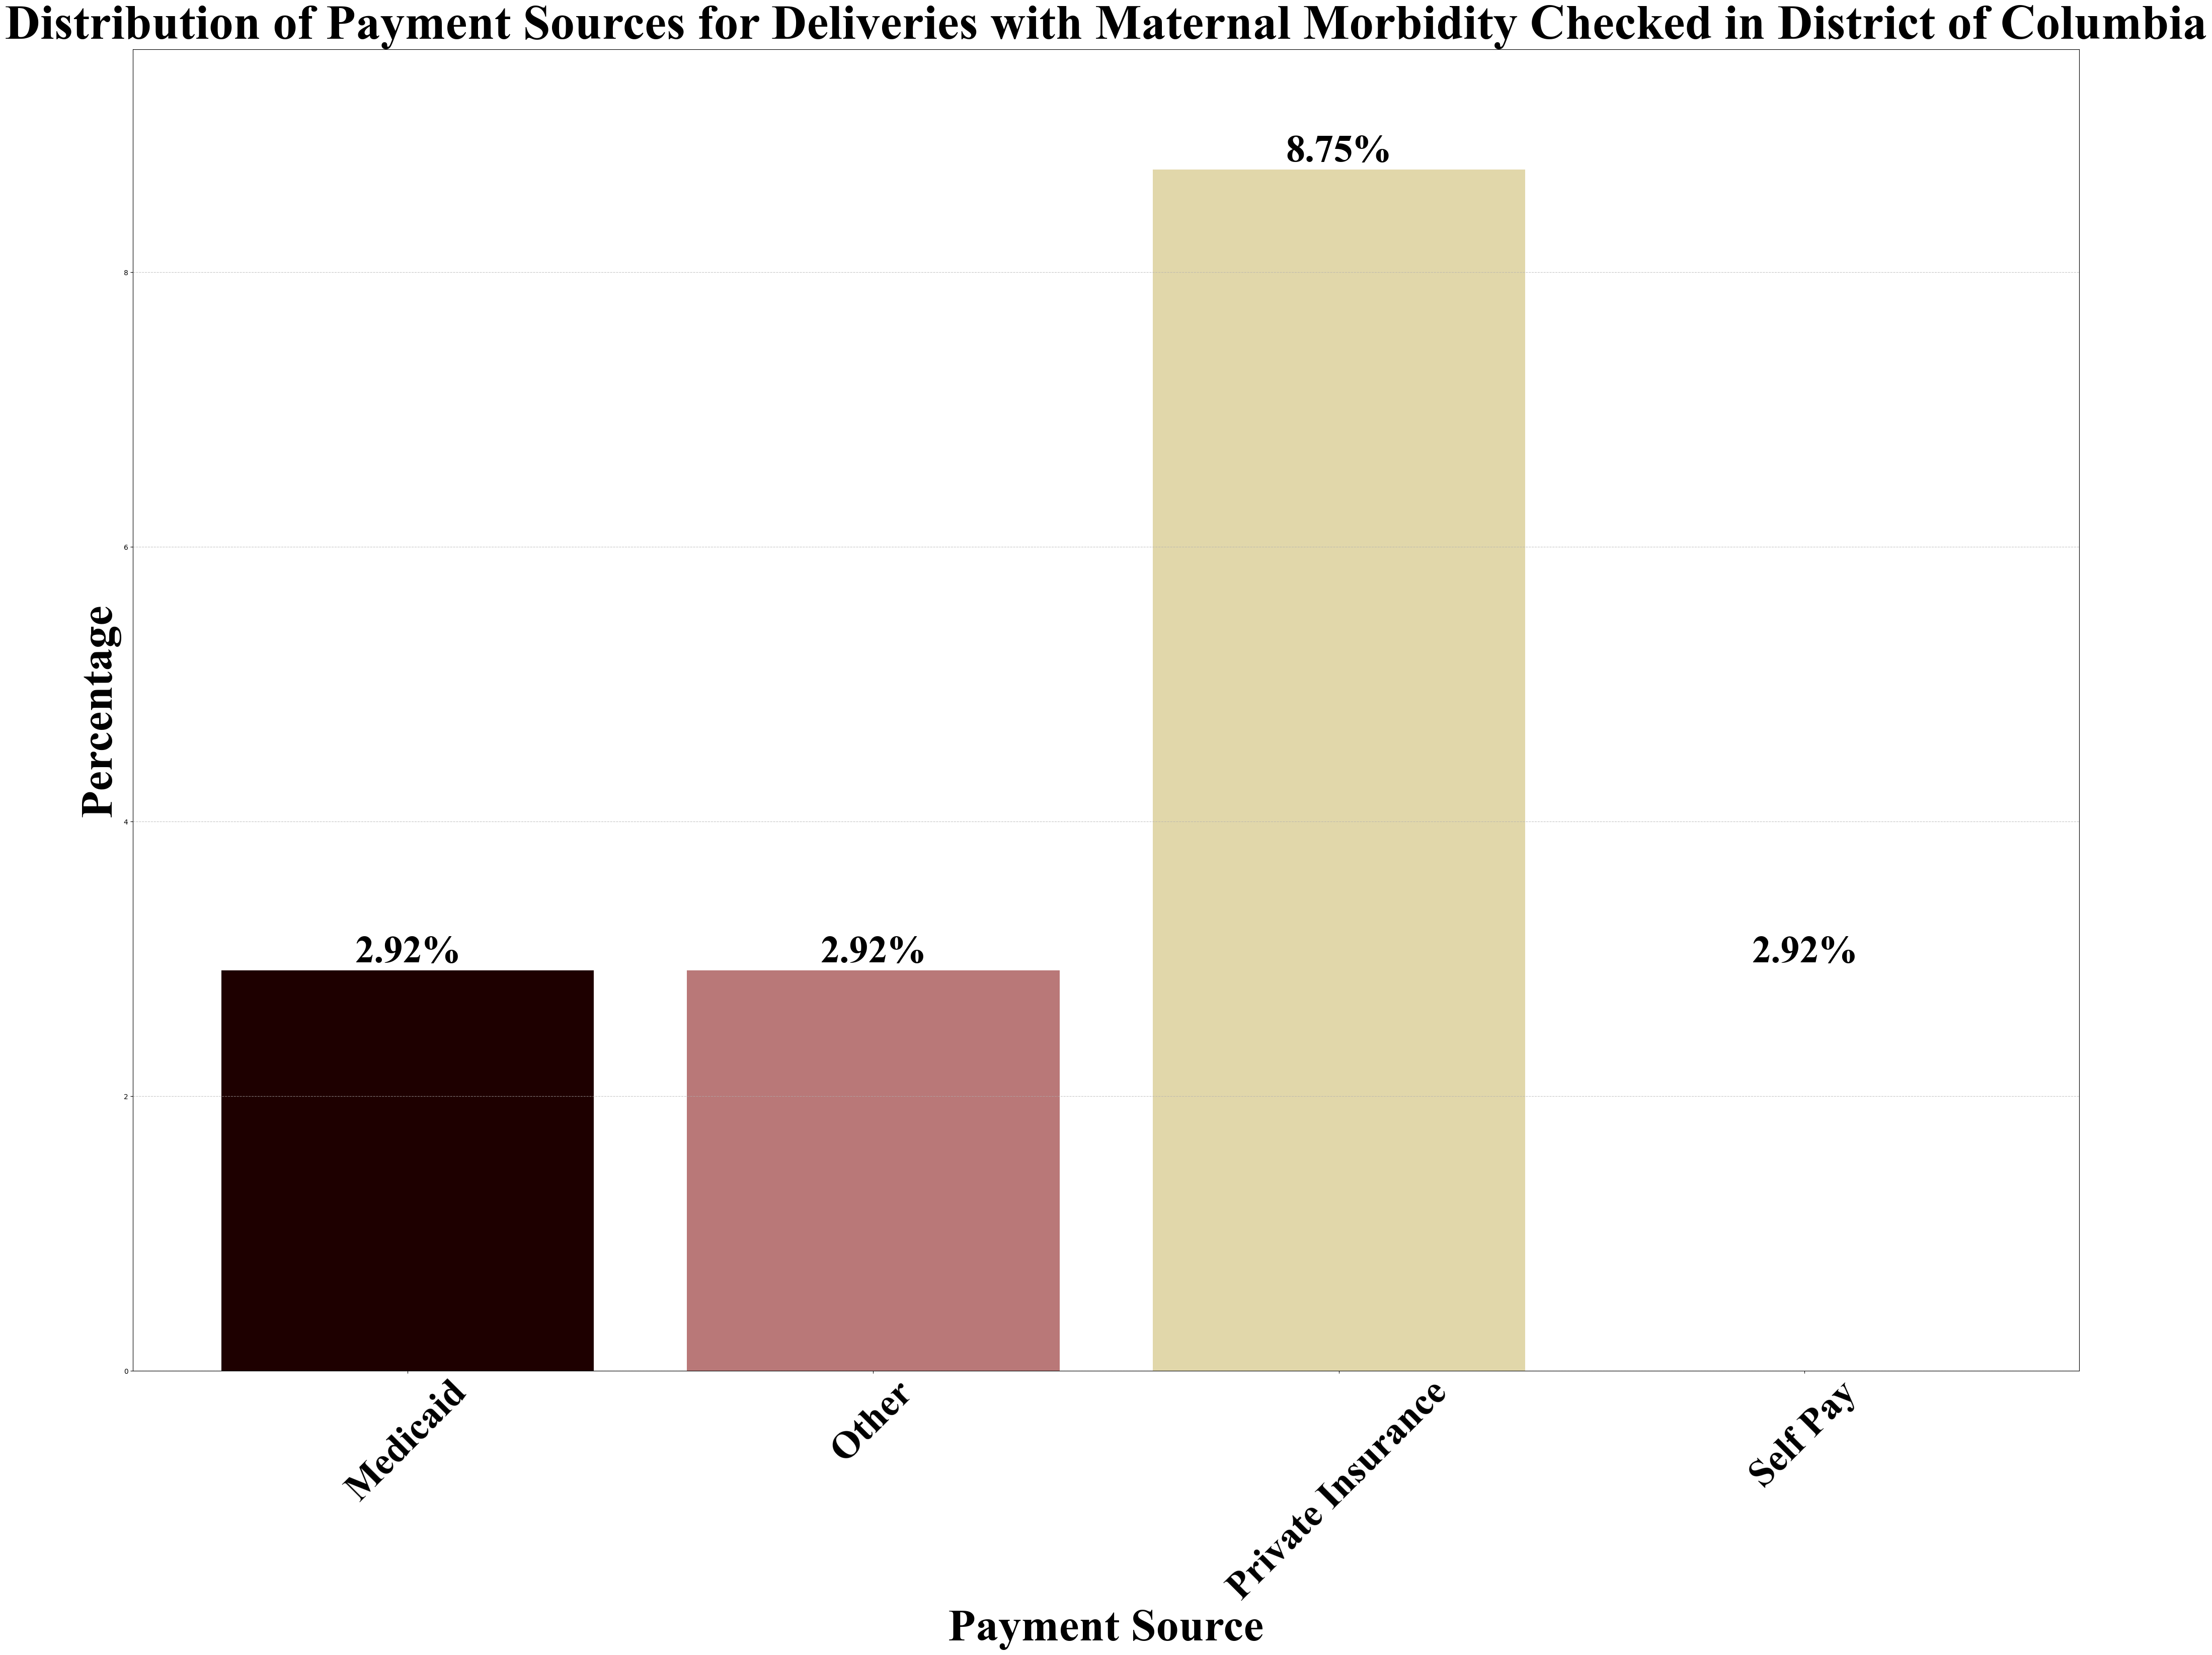

In [306]:
# Get the payment sources and their percentages for Delaware
percentages = payment_source_data[payment_source_data['State of Residence'] == 'District of Columbia'][['Medicaid', 'Other', 'Private Insurance', 'Self Pay']].values[0] * 100

# Define colors using a colormap
colors = plt.cm.pink(np.linspace(0, 1, len(percentages)))

# Plotting
plt.figure(figsize=(40, 33))
bars = plt.bar(['Medicaid', 'Other', 'Private Insurance', 'Self Pay'], percentages, color=colors)
plt.title('Distribution of Payment Sources for Deliveries with Maternal Morbidity Checked in District of Columbia', fontsize=70, fontweight='bold', color='black', fontname='Times New Roman')
plt.xlabel('Payment Source', fontsize=65, fontweight='bold', fontname='Times New Roman')
plt.ylabel('Percentage', fontsize=65, fontweight='bold', fontname='Times New Roman')
plt.ylim(0, max(percentages) * 1.1) # Setting y-axis limit to provide some padding
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=55, fontweight='bold', fontname='Times New Roman') # Rotate x-axis labels for better readability

for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=55, fontweight='bold', fontname='Times New Roman')

plt.tight_layout()
plt.savefig('payment_dc.png', transparent=True)

plt.show()


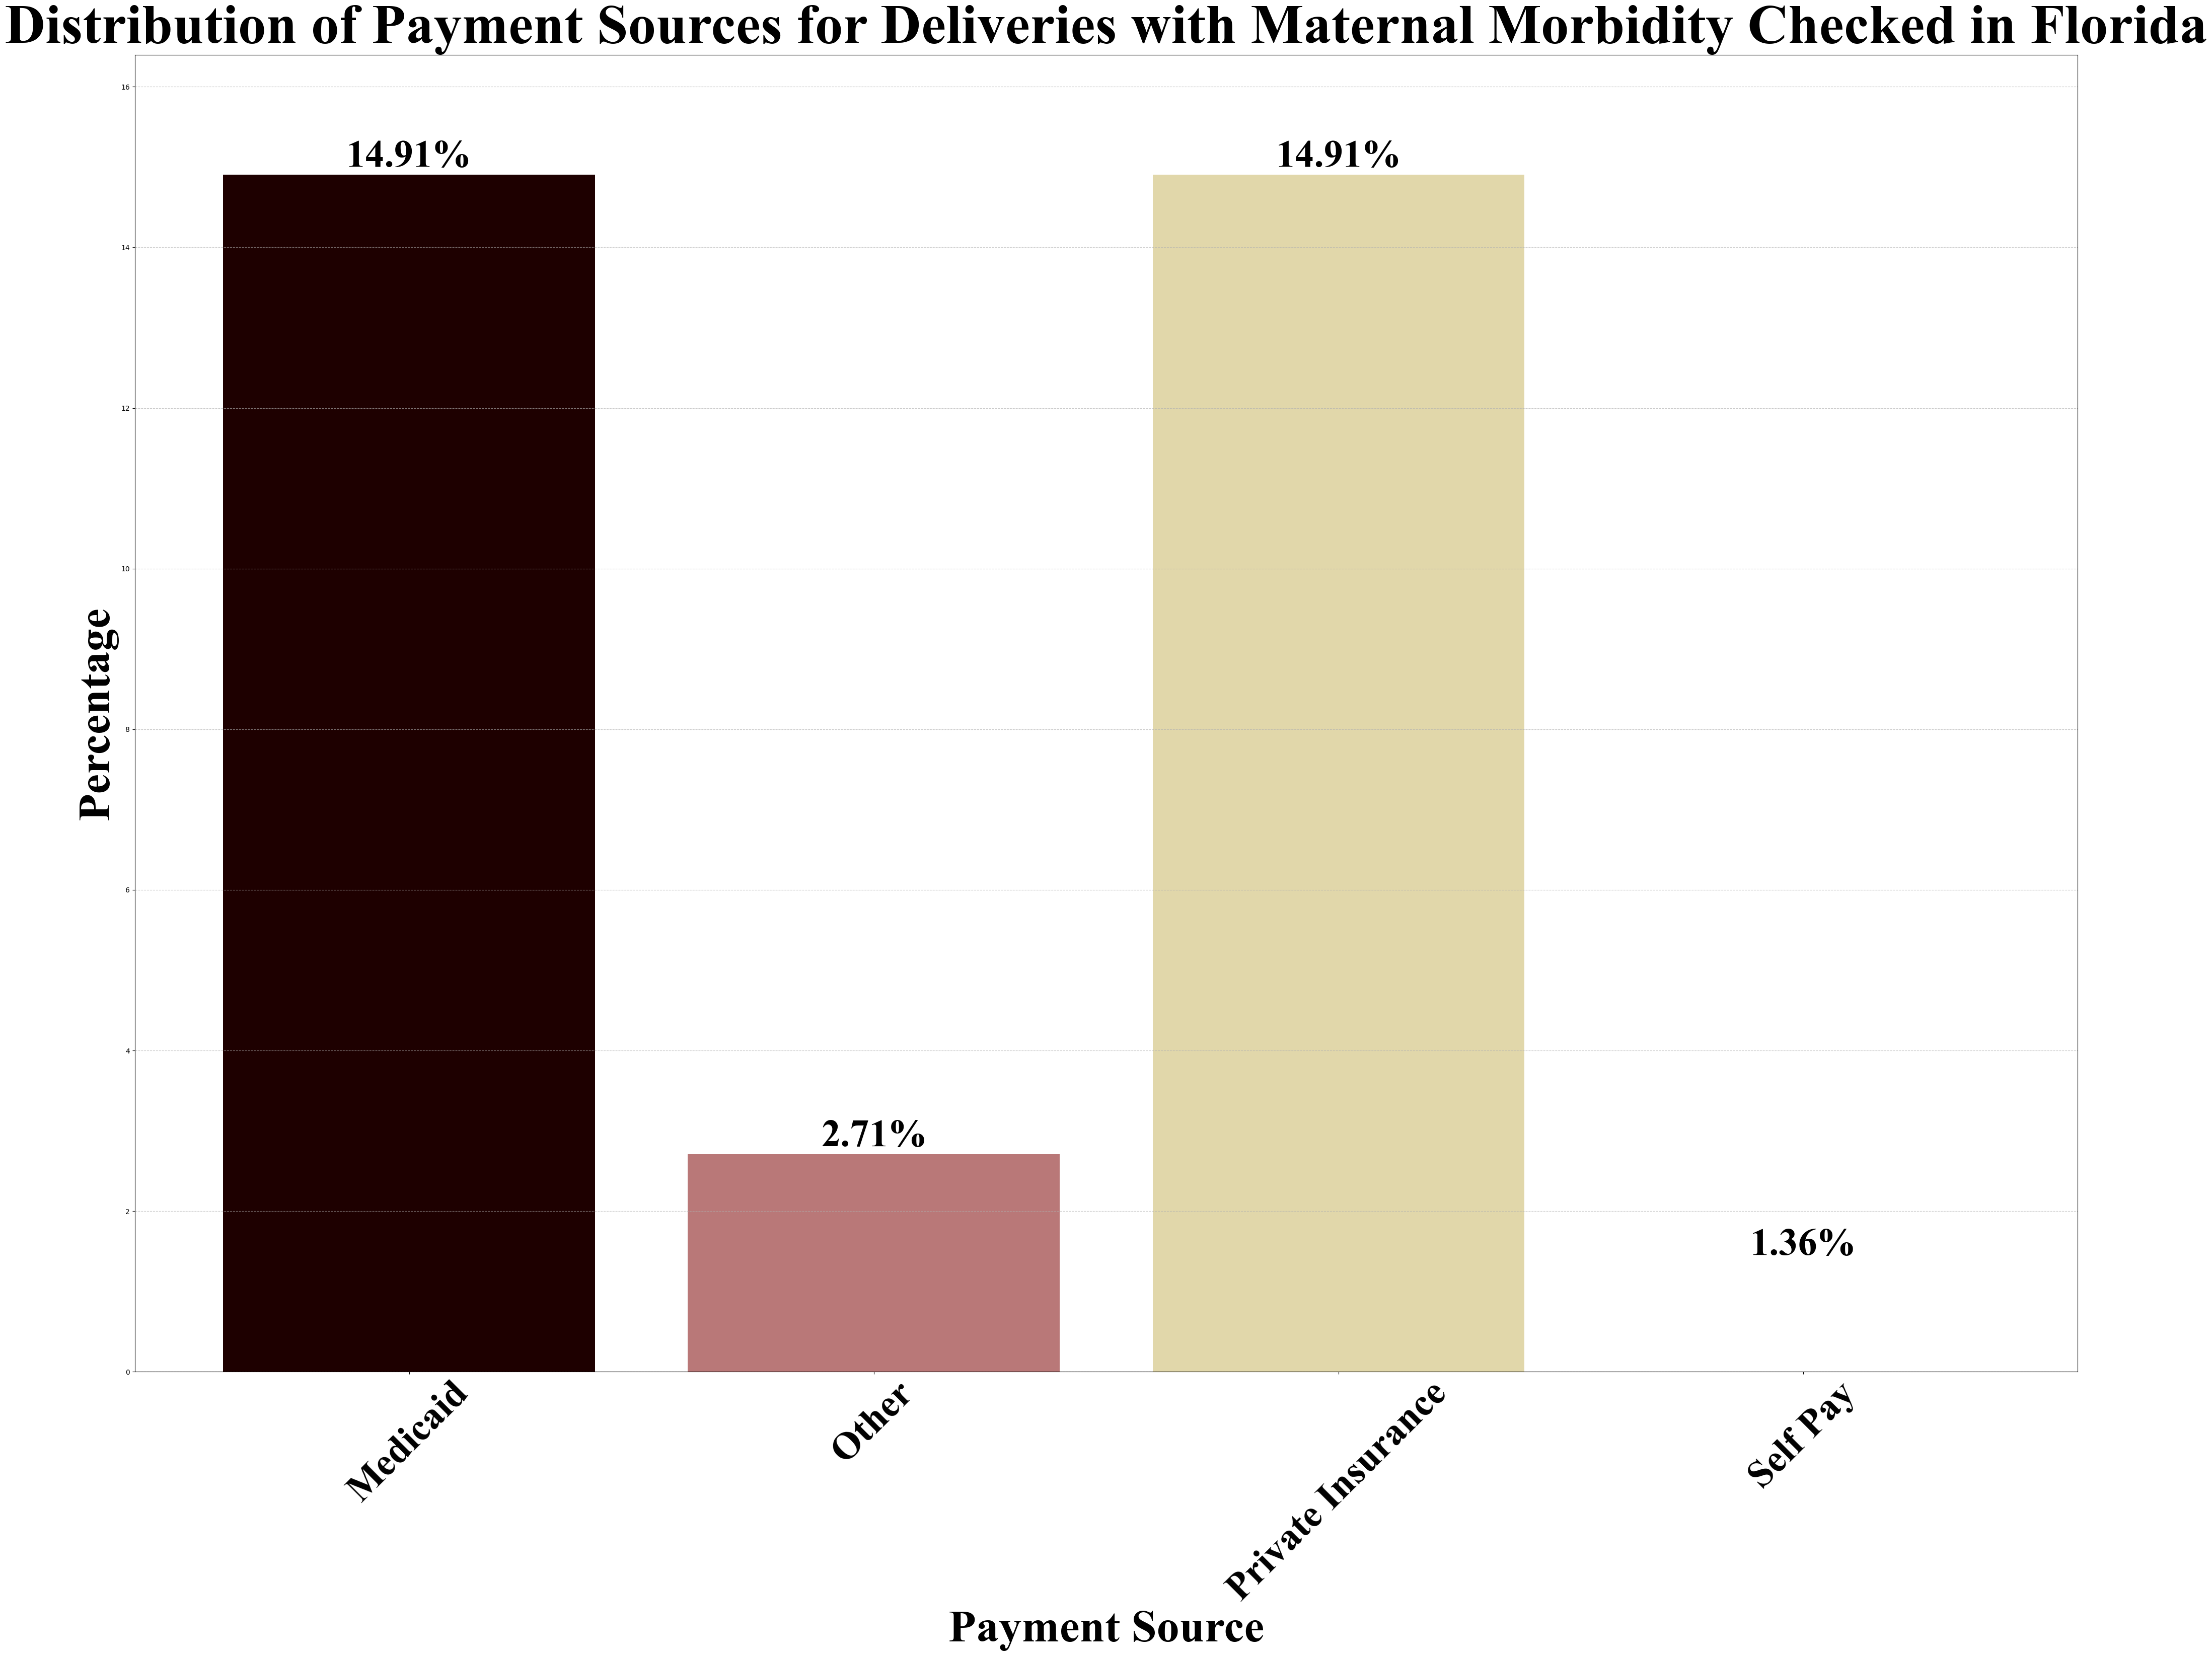

In [305]:
# Get the payment sources and their percentages for Delaware
percentages = payment_source_data[payment_source_data['State of Residence'] == 'Florida'][['Medicaid', 'Other', 'Private Insurance', 'Self Pay']].values[0] * 100

# Define colors using a colormap
colors = plt.cm.pink(np.linspace(0, 1, len(percentages)))

# Plotting
plt.figure(figsize=(40, 33))
bars = plt.bar(['Medicaid', 'Other', 'Private Insurance', 'Self Pay'], percentages, color=colors)
plt.title('Distribution of Payment Sources for Deliveries with Maternal Morbidity Checked in Florida', fontsize=80, fontname='Times New Roman', fontweight='bold', color='black')
plt.xlabel('Payment Source', fontsize=65, fontweight='bold', fontname='Times New Roman')
plt.ylabel('Percentage', fontsize=65, fontweight='bold', fontname='Times New Roman')
plt.ylim(0, max(percentages) * 1.1) # Setting y-axis limit to provide some padding
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=55, fontweight='bold', fontname='Times New Roman') # Rotate x-axis labels for better readability

for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=55, fontweight='bold', fontname='Times New Roman')

plt.tight_layout()
plt.savefig('payment_fl.png', transparent=True)

plt.show()